## Using Xarray to read in netcdf + subset area of interest (AOI)

#### Following tutorial on https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/subset-netcdf4-climate-data-spatially-aoi/

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import geopandas as gpd

import xarray as xr
import regionmask

import datetime as dt



# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")


### 1. Importing files + plotting Maps
#### NetCDF

In [244]:
# Get netcdf file
fn = 'GRCTellus.JPL.200204_202108.GLO.RL06M.MSCNv02CRI.nc'

# Open up the data
jpl = xr.open_dataset(fn)
    
# View xarray object
jpl

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 200, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-08-16T1...
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2021-10-05T10:10:22Z

#### Shapefiles 

In [245]:
# Read in shapefile (zip) to generate AOI
# Full basin São Francisco
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/RegioesHidrograficasBrasil.zip")
basins = gpd.read_file(url)
basins.head()

objectid rhi_sg  rhi_cd                        rhi_nm  rhi_ar_km2  \
0         1      J      12                       URUGUAI   174127.78   
1         2      C       3  ATLÂNTICO NORDESTE OCIDENTAL   268906.01   
2         4      D       9                      PARNAÍBA   331808.82   
3         5      E       4   ATLÂNTICO NORDESTE ORIENTAL   285281.21   
4         7      F      10                 SÃO FRANCISCO   636137.07   

     rhi_ar_ha    rhi_gm_are    rhi_gm_per rhi_ve rhi_cheia2 rhi_seca20  \
0  17412778.00  174127780212  3.383864e+06   2014        Sim        Não   
1  26890601.61  268906015339  5.943115e+06   2014        Não        Sim   
2  33180882.72  331808826927  3.763766e+06   2014        Não        Sim   
3  28528121.80  285281216504  3.627052e+06   2014        Não        Sim   
4  63613707.72  636137076379  7.056413e+06   2014        Não        Sim   

                                            geometry  
0  POLYGON ((-53.36460 -26.24709, -53.36069 -26.2...  
1  MULTIPOLYGON (((-47.69682 -0.56062, -47.69644 ...  
2  POLYGON ((-41.78675 -2.74412, -41.79417 -2.754...  
3  MULTIPOLYGON (((-41.78202 -2.75715, -41.78031 ...  
4  POLYGON ((-39.89673 -7.26245, -39.89423 -7.263...

In [246]:
# Sub-basins SF
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/meso_RH.zip")
sub_basins = gpd.read_file(url)
#sub_basins

In [247]:
# Sub-sub-basins
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/Sub-bacias_Hidrograficas_DNAEE.zip")
ssub_basins = gpd.read_file(url)
# ssub_basins[10:30]

In [248]:
# States of Brazil
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/estados_2010.zip")
estados = gpd.read_file(url)

In [249]:
# States of Brazil
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/AtlasMar_BiomasBrasil.zip")
biomas = gpd.read_file(url)
biomas

id  objectid          biomas  shape_leng  shape_area  \
0  0.0         0         MARINHO    0.000000    0.000000   
1  NaN         1        AMAZÔNIA  202.147635  343.368038   
2  NaN         2        CAATINGA   72.707525   68.087107   
3  NaN         3         CERRADO  214.876816  171.561204   
4  NaN         4           PAMPA   50.195778   15.568986   
5  NaN         5        PANTANAL   30.922744   12.908706   
6  NaN         6  MATA ATLÂNTICA  199.743396   97.942348   

                                            geometry  
0  MULTIPOLYGON (((-49.67763 -29.27940, -49.71897...  
1  MULTIPOLYGON (((-43.99908 -2.39274, -43.99933 ...  
2  POLYGON ((-35.53981 -5.14214, -35.54210 -5.154...  
3  POLYGON ((-43.38159 -2.33368, -43.38199 -2.338...  
4  POLYGON ((-55.45586 -28.09896, -55.45451 -28.0...  
5  POLYGON ((-57.81921 -15.72446, -57.81203 -15.7...  
6  MULTIPOLYGON (((-49.72096 -29.27436, -49.72130...

In [250]:
pd.set_option('display.max_rows', None)  # or 1000
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/world_rivers.zip")
rios = gpd.read_file(url)
rios

RIVER_MAP                                           geometry
0                    Olenek  LINESTRING (121.20432 72.79510, 121.17276 72.8...
1                    Olenek  LINESTRING (120.99666 72.79434, 121.00526 72.7...
2                  Khatanga  LINESTRING (102.04133 71.93140, 102.05942 71.9...
3                   Pyasina  LINESTRING (90.00110 71.84915, 90.01054 71.855...
4                    Anabar  LINESTRING (114.18552 71.77223, 114.21054 71.7...
5                     Kotuy  LINESTRING (102.14145 71.91164, 102.14166 71.9...
6                     Kotuy  LINESTRING (102.97397 71.52998, 102.95804 71.5...
7                     Kheta  LINESTRING (102.08971 71.88680, 102.08276 71.8...
8                     Kheta  LINESTRING (99.56084 71.44627, 99.54832 71.465...
9                    Olenek  LINESTRING (121.20432 72.79510, 121.23193 72.8...
10                   Olenek  LINESTRING (122.48291 71.03391, 122.47859 71.0...
11                   Anabar  LINESTRING (113.36961 70.81995, 113.39833 70.8...
12                  Popigay  LINESTRING (110.65109 70.82083, 110.66609 70.8...
13                    Udzha  LINESTRING (117.97943 70.35971, 117.98526 70.3...
14                  Yenisey  LINESTRING (82.63527 70.17053, 82.60220 70.171...
15                  Pyasina  LINESTRING (88.01555 70.06165, 88.05582 70.074...
16                  Yenisey  LINESTRING (82.97855 69.97783, 82.97415 69.986...
17                  Yenisey  LINESTRING (82.97855 69.97783, 82.95915 69.981...
18                  Yenisey  LINESTRING (83.32730 69.86592, 83.31647 69.859...
19                  Yenisey  LINESTRING (82.34215 70.17679, 82.32471 70.174...
20                    Kheta  LINESTRING (94.24887 69.81248, 94.26999 69.813...
21                    Kheta  LINESTRING (91.88220 69.83305, 91.88638 69.839...
22                Indigirka  LINESTRING (147.57690 69.56776, 147.58218 69.5...
23                  Pyasina  LINESTRING (88.14198 69.45261, 88.14888 69.460...
24                 Kuonamka  LINESTRING (106.26443 69.39972, 106.26860 69.3...
25                     Lena  LINESTRING (124.12970 69.15166, 124.18831 69.1...
26                Indigirka  LINESTRING (147.57690 69.56776, 147.56802 69.5...
27                Indigirka  LINESTRING (147.42636 69.02470, 147.42441 69.0...
28                   Muonio  LINESTRING (20.88894 68.92584, 20.89799 68.929...
29                   Muonio  LINESTRING (20.65006 69.04379, 20.64666 69.043...
30                   Muonio  LINESTRING (20.88894 68.92584, 20.89417 68.922...
31             Tana (No Fi)  LINESTRING (25.64750 68.89972, 25.65277 68.906...
32                 Colville  LINESTRING (-156.92252 68.87360, -156.90585 68...
33                   Malaya  LINESTRING (112.50000 69.22298, 112.50221 69.2...
34                  Pyasina  LINESTRING (89.56026 68.83138, 89.54166 68.840...
35             Tana (No Fi)  LINESTRING (24.64352 68.75560, 24.65010 68.756...
36             Tana (No Fi)  LINESTRING (24.57296 68.76057, 24.57528 68.764...
37             Tana (No Fi)  LINESTRING (24.41288 68.73071, 24.42816 68.739...
38                  Pyasina  LINESTRING (90.00000 68.68171, 90.00526 68.680...
39                 Colville  LINESTRING (-160.26779 68.64888, -160.24609 68...
40                   Tuloma  LINESTRING (31.73940 68.63359, 31.75639 68.631...
41                   Muonio  LINESTRING (20.88894 68.92584, 20.88307 68.913...
42                   Tuloma  LINESTRING (31.11858 68.61562, 31.13139 68.619...
43               Bol. Anyuy  LINESTRING (160.78234 68.48182, 160.78720 68.4...
44                   Tuloma  LINESTRING (28.25611 68.66165, 28.25777 68.653...
45                   Olenek  LINESTRING (117.60072 68.42961, 117.62553 68.4...
46                   Omoloy  LINESTRING (129.55348 68.47695, 129.58661 68.4...
47                    Kotuy  LINESTRING (103.11499 68.39388, 103.10637 68.3...
48                     Yana  LINESTRING (134.86108 68.38361, 134.89526 68.3...
49                   Tuloma  LINESTRING (31.73940 68.63359, 31.73194

##### Select areas of interest / bounds

In [251]:
# Use the bounds of SF basin to determine the slice values for this data
sf_full = basins[basins.rhi_nm == "SÃO FRANCISCO"]
# Get the total spatial extent for São Francisco
#total_bounds returns minx, miny, maxx, maxy --> rectangular slice!
sf_full.total_bounds

array([-47.64526532, -20.9310627 , -36.30258742,  -7.26245063])

In [252]:
# Adjusts longitude values of the netcdf to shapefile coordinate system (-180 to 180)
jpl.coords['lon'] = (jpl.coords['lon'] + 180) % 360 - 180
jpl = jpl.sortby(jpl.lon)

In [253]:
# Get lat min, max
aoi_lat = [float(sf_full.total_bounds[1]), float(sf_full.total_bounds[3])]
aoi_lon = [float(sf_full.total_bounds[0]), float(sf_full.total_bounds[2])]
# Notice that the longitude values have negative numbers
# we need these values in a global crs so we can subtract from 360
aoi_lat, aoi_lon

([-20.931062696369775, -7.262450633763059],
 [-47.645265318999975, -36.302587421])

In [254]:
# The netcdf files use a lon from 0-360: this adjusts the bounds of the SHAPEFILE --> netcdf coordinates
# aoi_lon[0] = aoi_lon[0] + 360
# aoi_lon[1] = aoi_lon[1] + 360
# aoi_lat, aoi_lon

In [255]:
# selecting SF sub-basins  
sf_med = sub_basins[sub_basins.nm_mesoRH == "Médio São Francisco"]
sf_sub = sub_basins[sub_basins.nm_mesoRH == "Submédio São Francisco"]
sf_bai = sub_basins[sub_basins.nm_mesoRH == "Baixo São Francisco"]
sf_alt = sub_basins[sub_basins.nm_mesoRH == "Alto São Francisco"]

# create a new data frame with only the SF sub-basins
sf_all = sf_med.copy(deep=True)
sf_all = sf_all.append([sf_sub,sf_bai,sf_alt])
sf_all

/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1490320128.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sf_all = sf_all.append([sf_sub,sf_bai,sf_alt])


fid   id cd_mesoRH               nm_mesoRH cd_macroRH     nm_macroRH  \
35  36.0  197     10628     Médio São Francisco        106  SÃO FRANCISCO   
36  37.0  196     10627  Submédio São Francisco        106  SÃO FRANCISCO   
41  42.0  219     10626     Baixo São Francisco        106  SÃO FRANCISCO   
38  39.0  205     10629      Alto São Francisco        106  SÃO FRANCISCO   

             area                                           geometry  
35  401292.244680  POLYGON ((-42.57987 -14.45708, -42.57991 -14.4...  
36  109159.759147  POLYGON ((-37.72319 -9.12348, -37.72291 -9.123...  
41   25254.922911  POLYGON ((-36.74904 -9.16875, -36.74905 -9.169...  
38   99460.464209  POLYGON ((-43.68320 -20.42876, -43.68314 -20.4...

In [256]:
# selecting all SF sub-sub-basins
sf_1 = ssub_basins[ssub_basins.DNS_NU_SUB == 40]
sf_2 = ssub_basins[ssub_basins.DNS_NU_SUB == 41]
sf_3 = ssub_basins[ssub_basins.DNS_NU_SUB == 42]
sf_4 = ssub_basins[ssub_basins.DNS_NU_SUB == 43]
sf_5 = ssub_basins[ssub_basins.DNS_NU_SUB == 44]
sf_6 = ssub_basins[ssub_basins.DNS_NU_SUB == 45]
sf_7 = ssub_basins[ssub_basins.DNS_NU_SUB == 46]
sf_8 = ssub_basins[ssub_basins.DNS_NU_SUB == 47]
sf_9 = ssub_basins[ssub_basins.DNS_NU_SUB == 48]
sf_10 = ssub_basins[ssub_basins.DNS_NU_SUB == 49]

# create a new data frame with only the SF sub-sub-basins
sf_allS = sf_1.copy(deep=True)
sf_allS = sf_allS.append([sf_2,sf_3,sf_4,sf_5,sf_6,sf_7,sf_8,sf_9,sf_10])
sf_allS

/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/2933544105.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sf_allS = sf_allS.append([sf_2,sf_3,sf_4,sf_5,sf_6,sf_7,sf_8,sf_9,sf_10])


OBJECTID  DNS_DNB_CD  DNS_NU_SUB                               DNS_NM  \
18        19           4          40  Alto São Francisco, até Três Marias   
19        20           4          41           Das Velhas - São Francisco   
22        23           4          42    Paracatu e outros - São Francisco   
21        22           4          43              Urucuia - São Francisco   
20        21           4          44         Verde Grande - São Francisco   
23        24           4          45    Corrente e outros - São Francisco   
24        25           4          46      Grande e outros - São Francisco   
25        26           4          47     Salitre e outros - São Francisco   
26        27           4          48       Pajeú e outros - São Francisco   
27        28           4          49    São Francisco, a jusante do Pajeú   

                                             geometry  
18  POLYGON ((-43.68379 -20.45409, -43.68536 -20.9...  
19  POLYGON ((-43.67236 -17.97291, -43.57203 -18.2...  
22  POLYGON ((-44.27600 -16.28462, -44.26666 -16.3...  
21  POLYGON ((-45.08822 -16.09739, -45.08248 -16.1...  
20  POLYGON ((-45.69528 -15.38757, -45.56752 -15.3...  
23  POLYGON ((-42.58574 -14.45710, -42.60387 -14.4...  
24  POLYGON ((-46.08946 -13.33680, -46.06523 -13.2...  
25  POLYGON ((-43.97267 -10.40245, -43.88554 -10.4...  
26  POLYGON ((-41.35949 -8.69978, -41.34464 -8.698...  
27  POLYGON ((-37.34375 -7.93647, -37.29701 -8.006...

##### Plotting area of interest (map!)

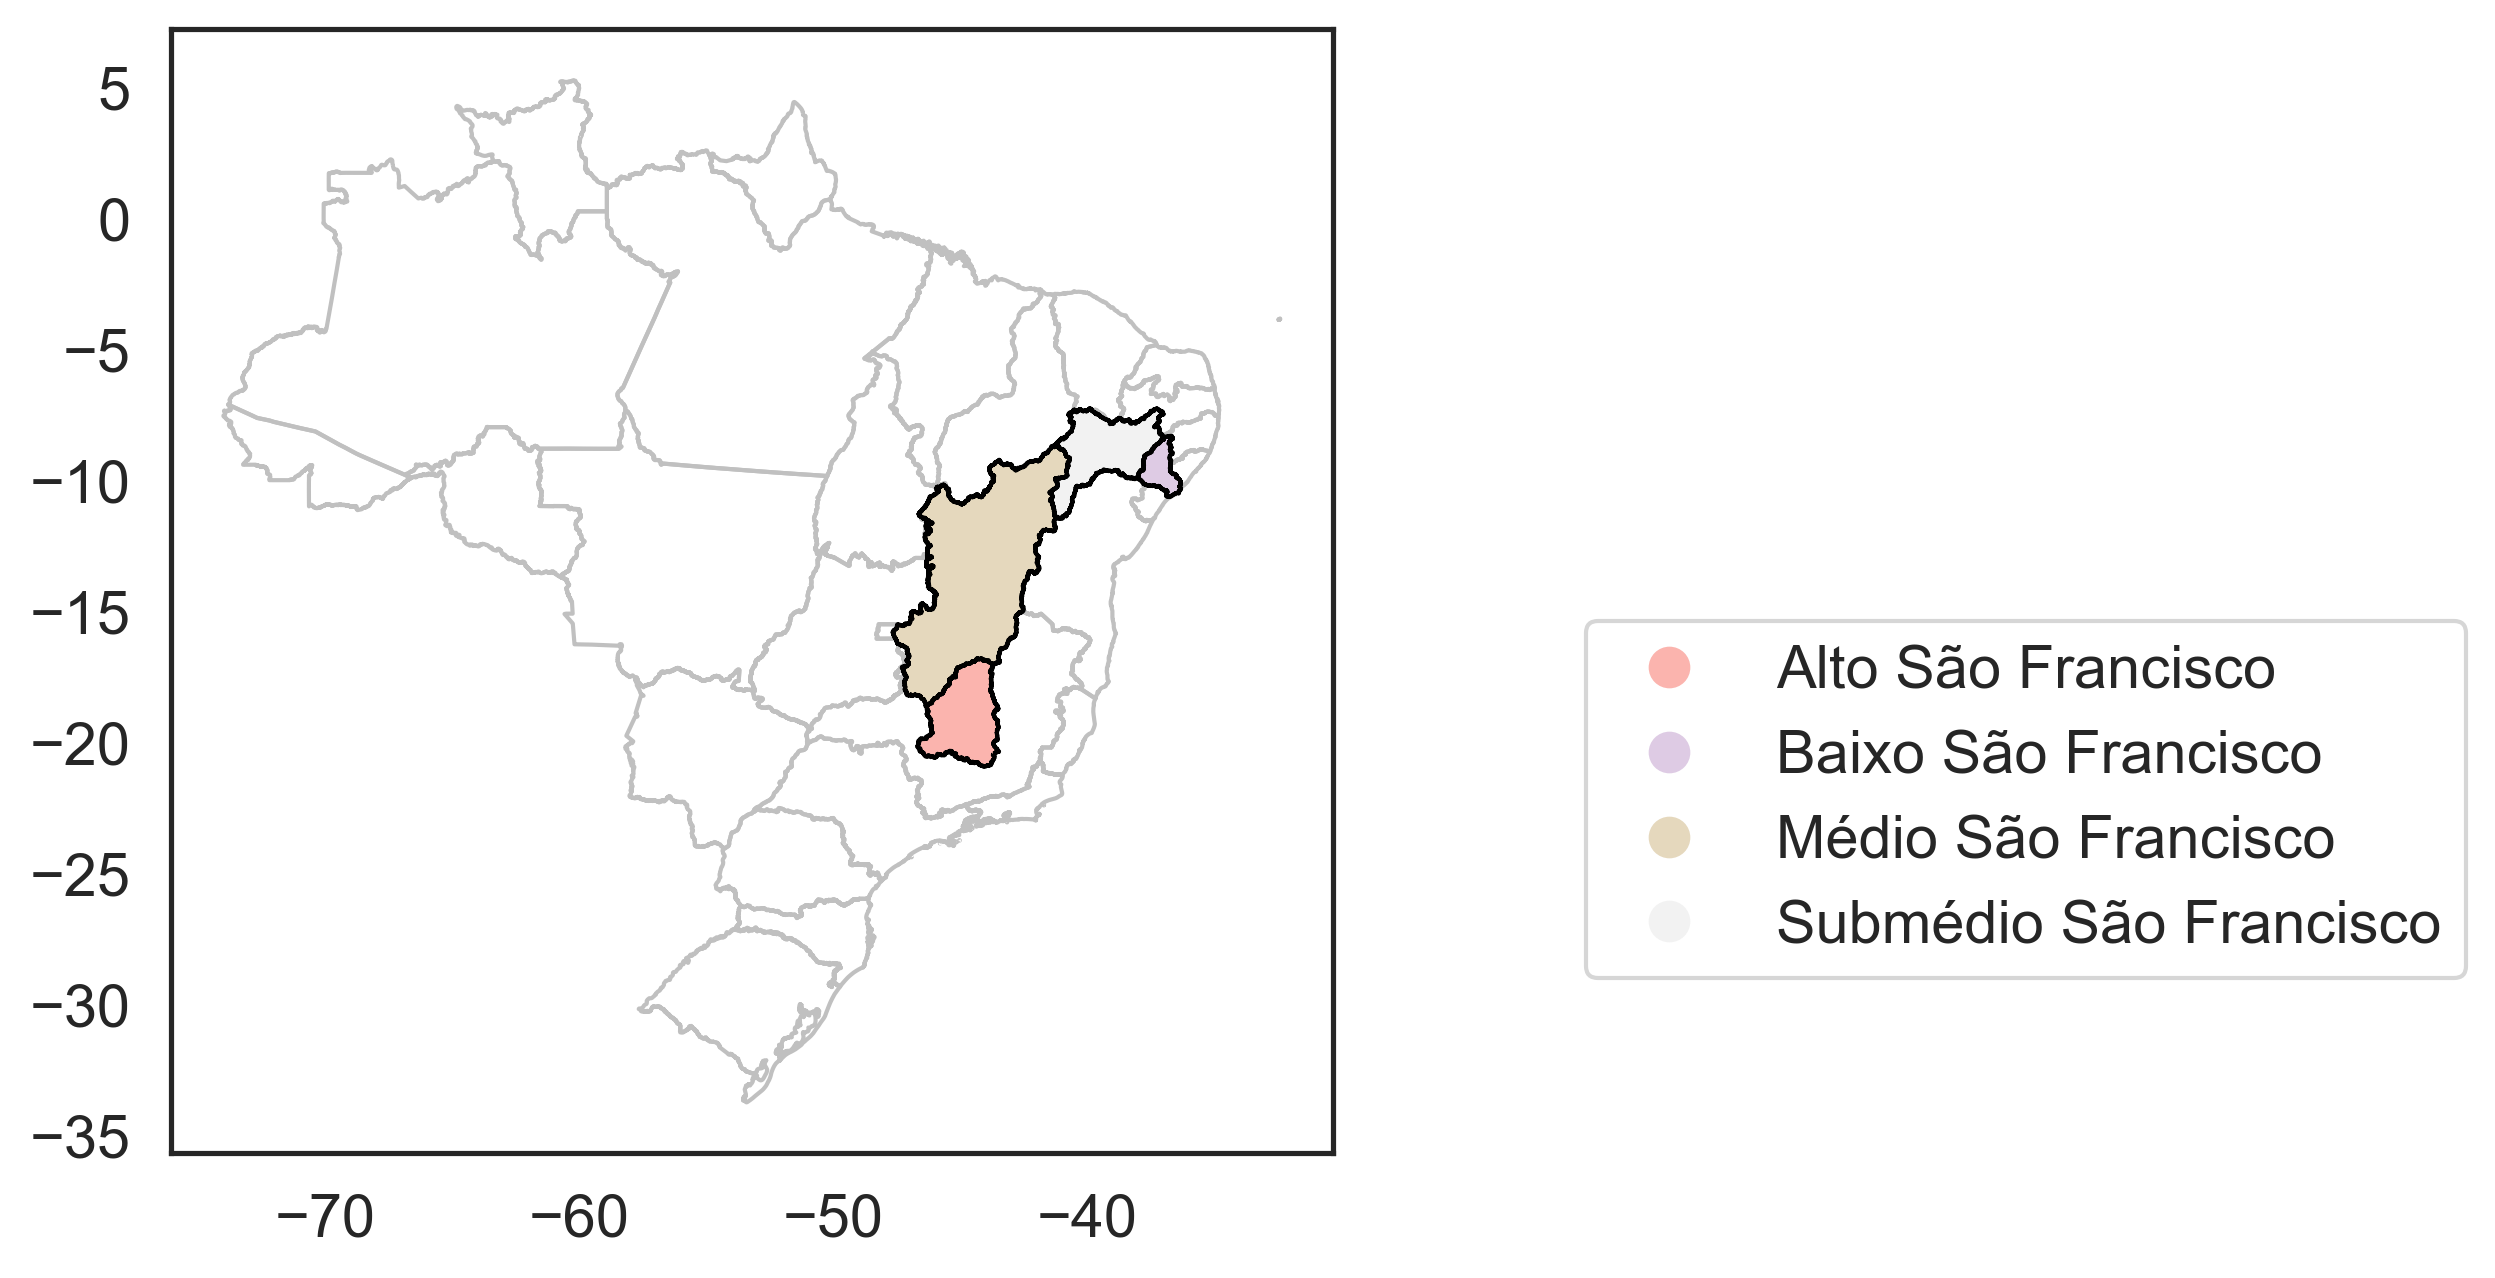

In [257]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.

# creates a figure f, with axes ax
f, ax = plt.subplots(figsize=[5,5], dpi=300)

# create a dictionary (key + object) for trying to map colors
# not sure why it doesn't want to work :(
cmap = {'Alto São Francisco':'yellow',
 'Baixo São Francisco':'gold',
 'Médio São Francisco':'orange',
 'Submédio São Francisco':'darkorange'}

estados.plot(ax=ax,edgecolor='silver', facecolor='none')
sf_all.plot(ax=ax, column='nm_mesoRH', cmap='Pastel1', edgecolor='black',categorical=True, legend=True)
#ax.set(xlim=(-50, -32), ylim=(-25, -5))
# rios.plot(ax=ax,color='skyblue')


#ax.set(title="São Francisco River Basin")

# helps show legend at desired location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5, 1.0,0))
plt.show()

# saves figure in same directory as the code file
f.savefig('mapa_são_francisco.png',bbox_inches='tight',transparent=True)


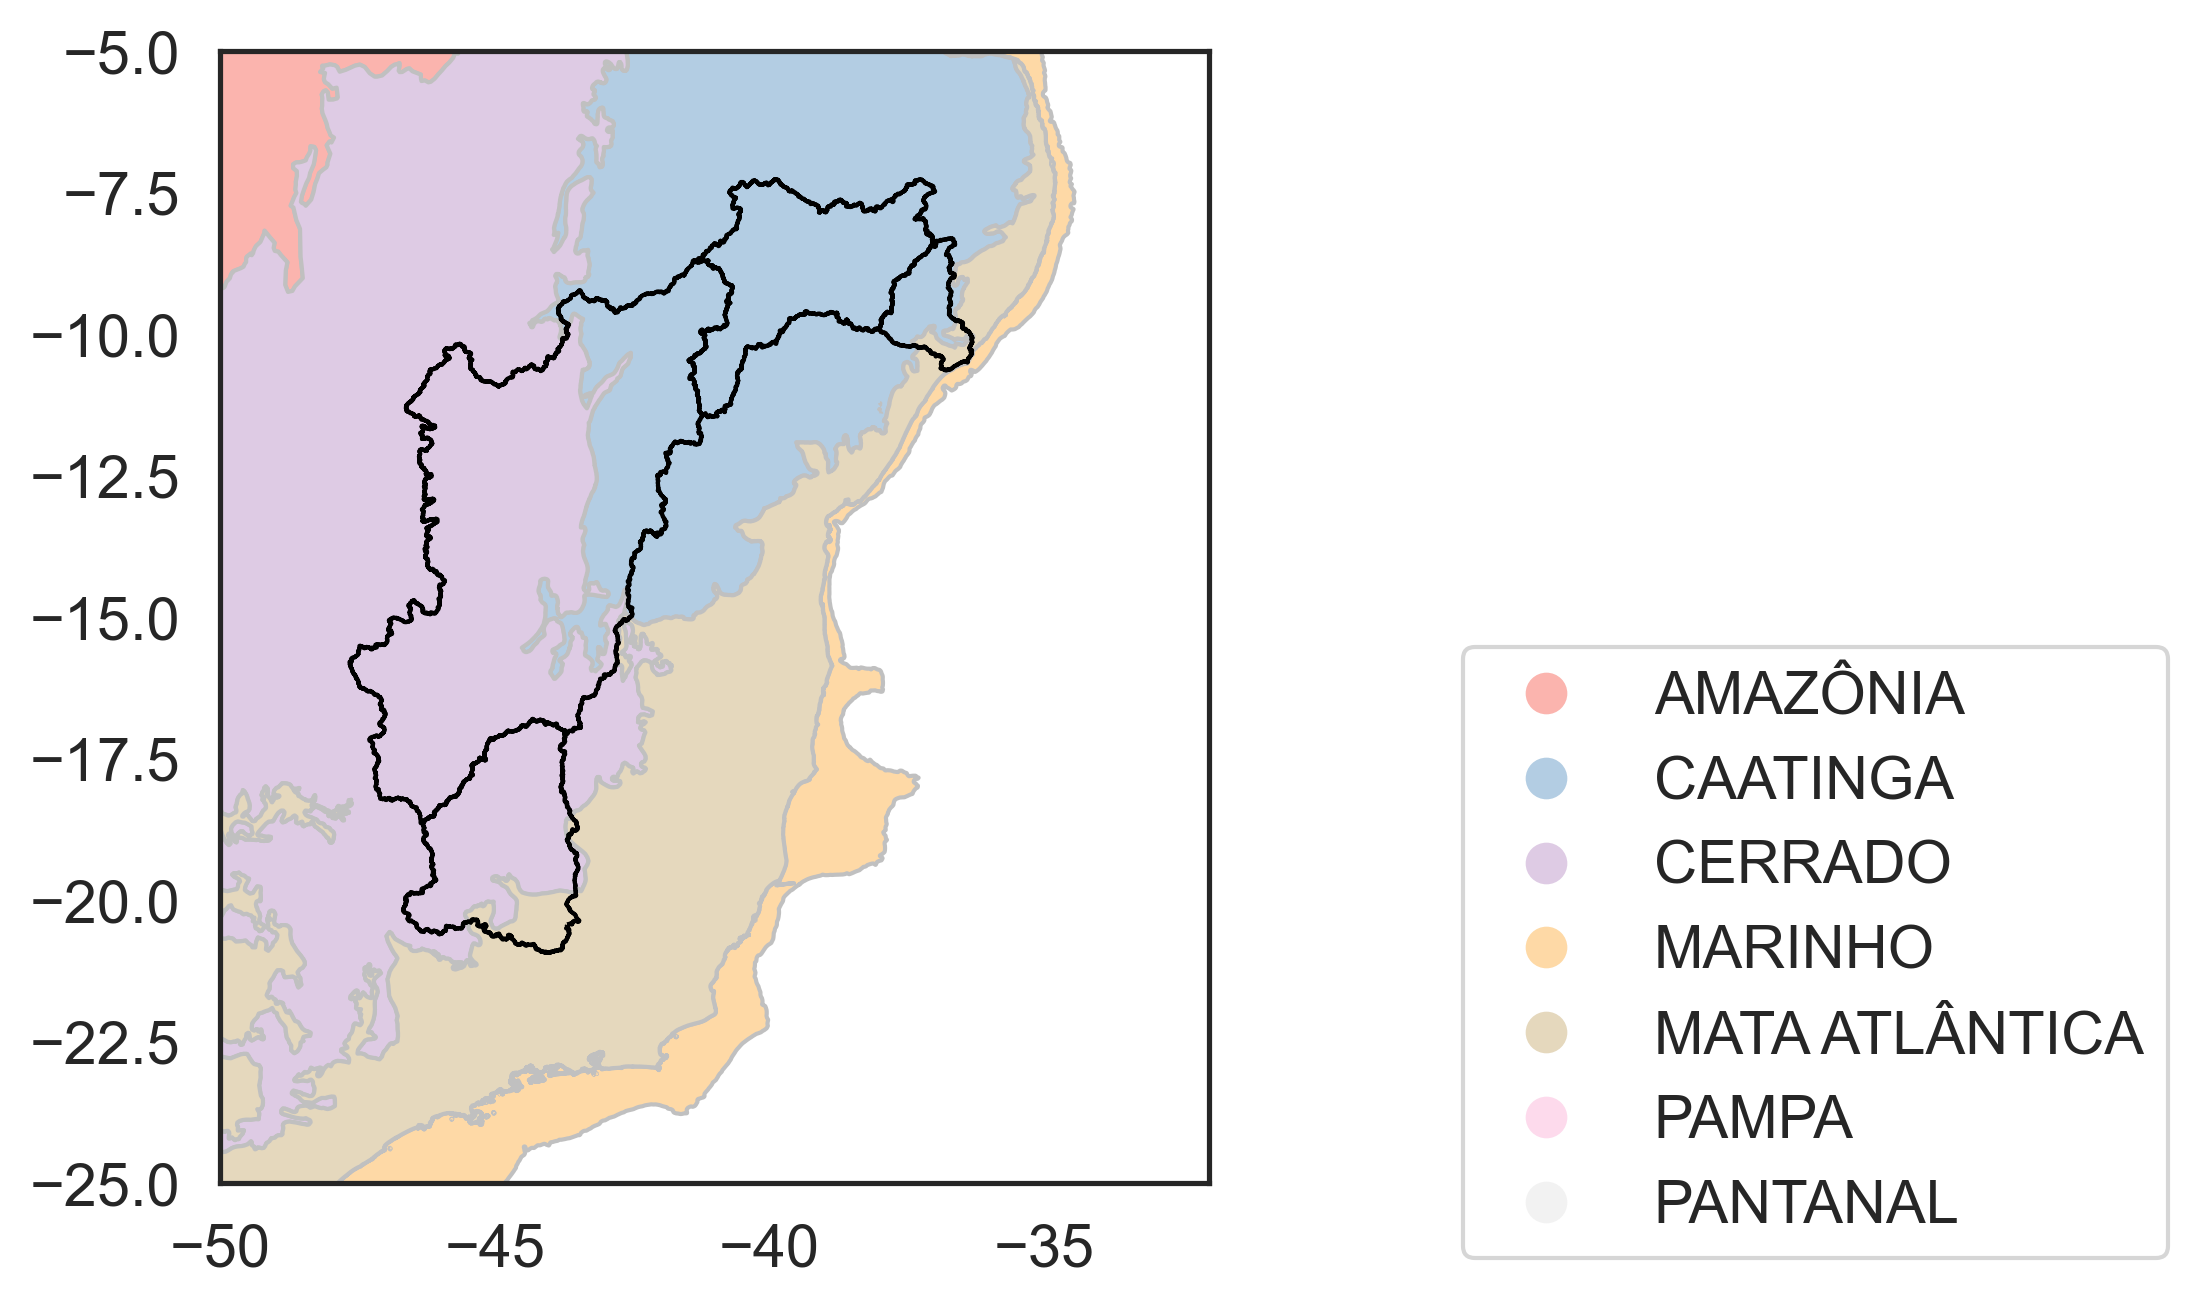

In [258]:
# creates a figure f, with axes ax
f, ax = plt.subplots(figsize=[5,5], dpi=300)

biomas.plot(ax=ax,edgecolor='silver', cmap='Pastel1', column='biomas', categorical=True, legend=True)
sf_all.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set(xlim=(-50, -32), ylim=(-25, -5))

# helps show legend at desired location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5, 1.0,0))
plt.show()

# saves figure in same directory as the code file
f.savefig('mapa_são_francisco_biomas.png',bbox_inches='tight', transparent=True)

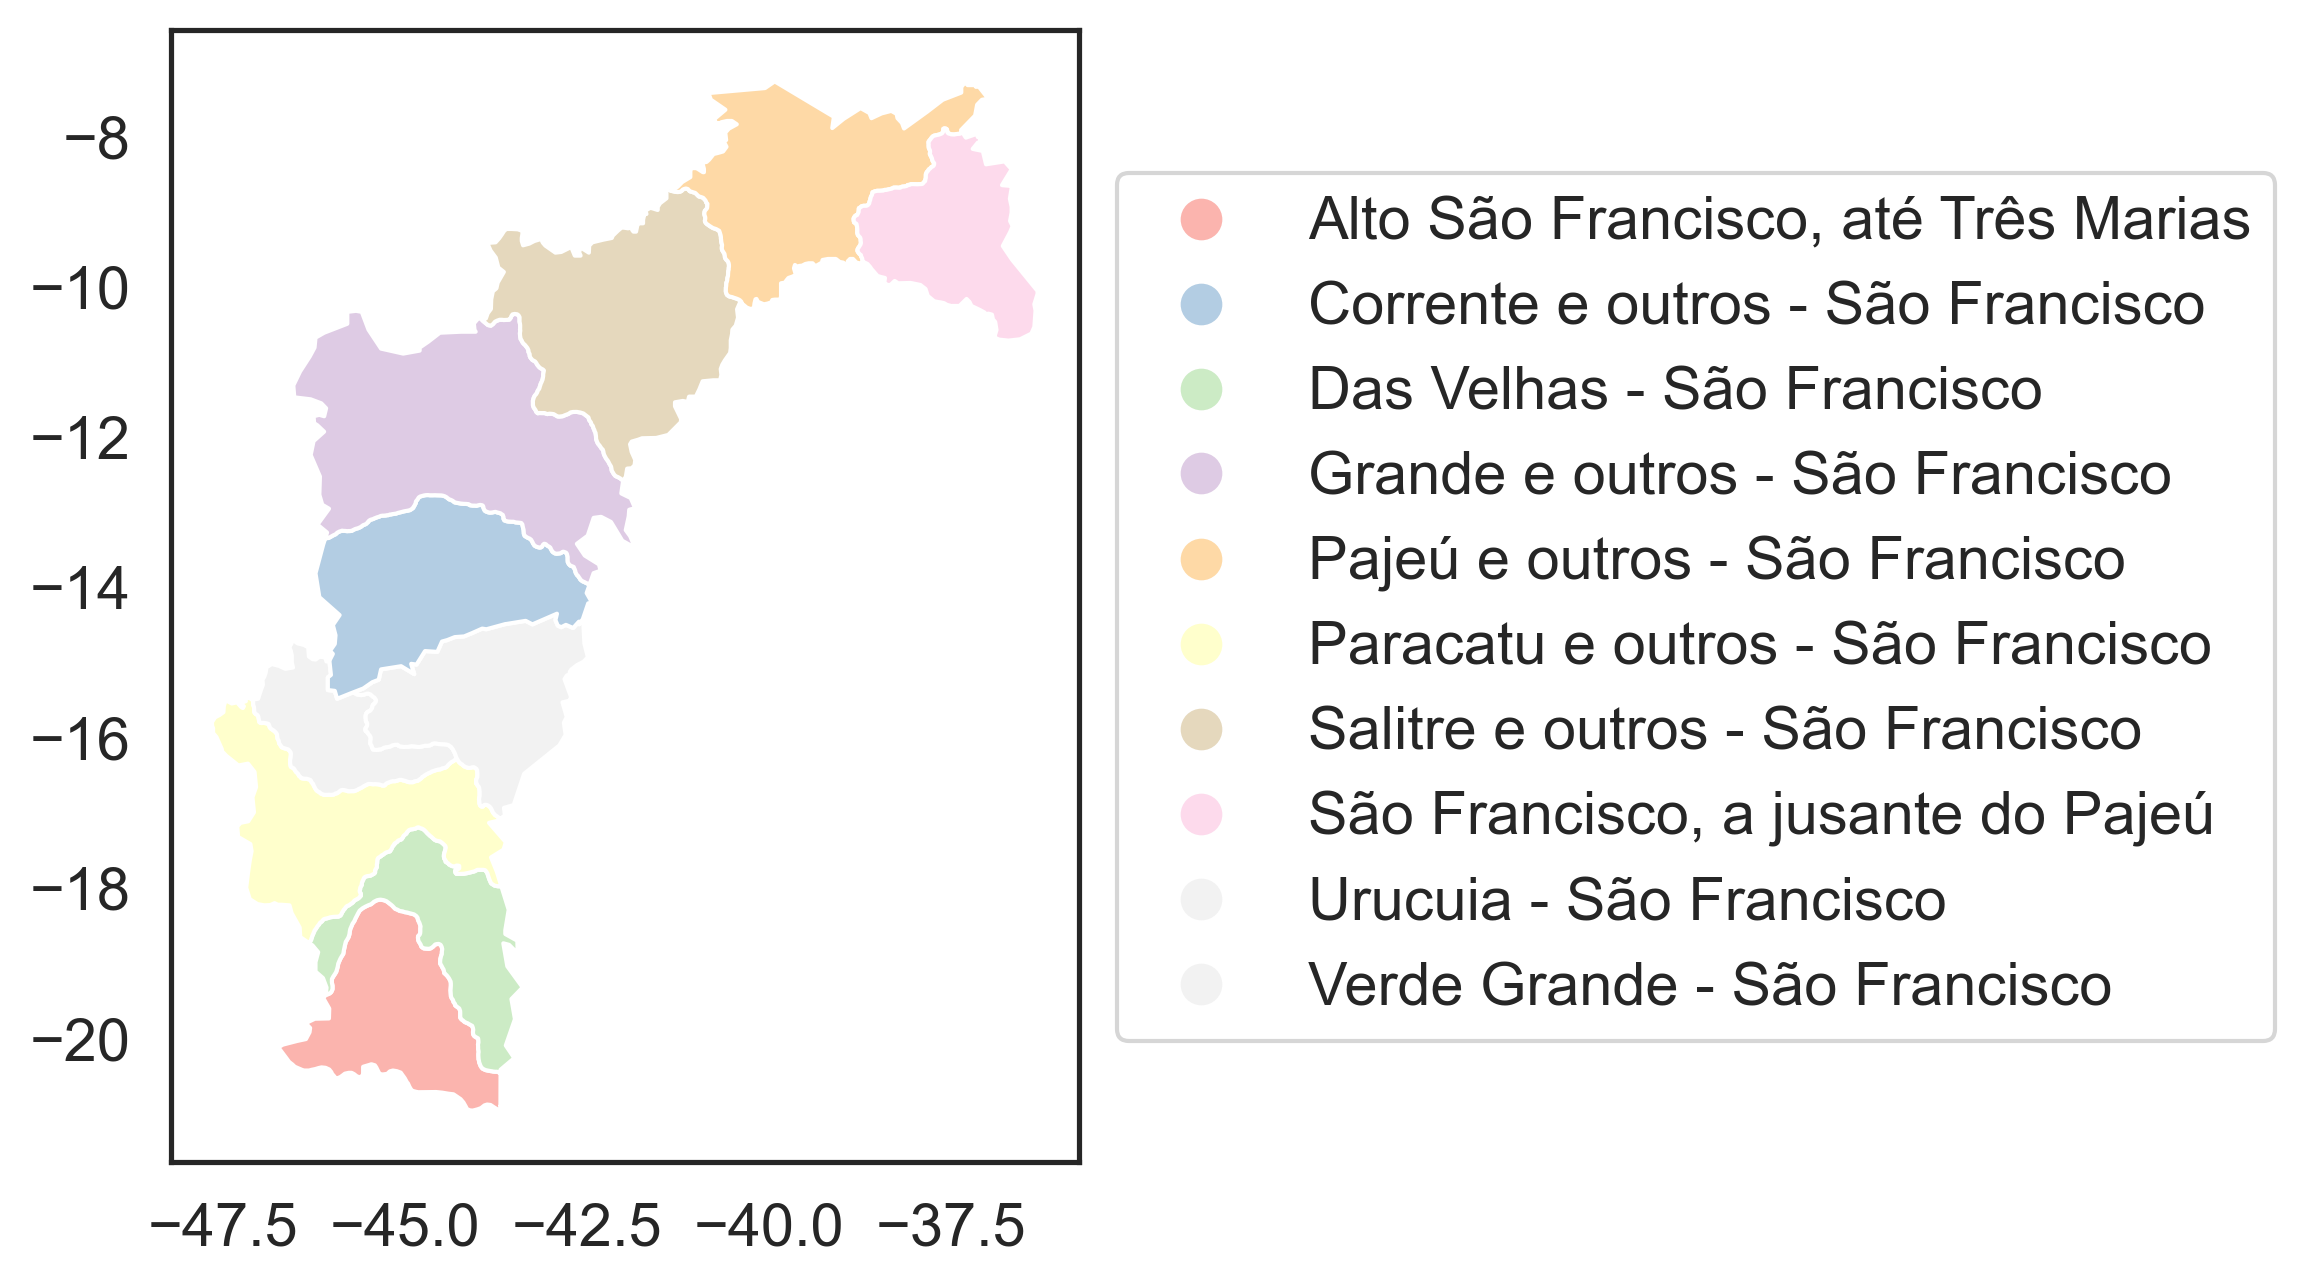

In [259]:
# creates a figure f, with axes ax
f, ax = plt.subplots(figsize=[5,5], dpi=300)

sf_allS.plot(ax=ax, column='DNS_NM', cmap='Pastel1', categorical=True, legend=True)
#ax.set(title="São Francisco River Basin")

# helps show legend at desired location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5, 1.35,0.4))
plt.show()

# saves figure in same directory as the code file
f.savefig('mapa_são_francisco2.png',bbox_inches='tight',transparent=True)


#### Time-series (water surface area)

In [260]:
# Read in monthly water-surface area for SF basin
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding//water:geospatial/monthly-water-surface-são-francisco.csv")
sfA = pd.read_csv(url)
sfA["Data"]=pd.to_datetime(sfA["Data"])
sfA

Data         Area        Trend
0   1985-01-02 00:00:00+00:00  707264.2301  796638.3808
1   1985-02-02 00:00:00+00:00  733375.1465  808627.9774
2   1985-03-02 00:00:00+00:00  777225.9694  821245.4659
3   1985-04-02 00:00:00+00:00  761481.1569  833484.8256
4   1985-05-02 00:00:00+00:00  813214.4370  840374.2218
5   1985-06-02 00:00:00+00:00  744743.1072  840307.9101
6   1985-07-02 00:00:00+00:00  771821.4435  833175.1616
7   1985-08-02 00:00:00+00:00  791214.9400  820357.6633
8   1985-09-02 00:00:00+00:00  792705.5406  805400.8017
9   1985-10-02 00:00:00+00:00  723188.5065  792675.7605
10  1985-11-02 00:00:00+00:00  652551.2244  784755.6700
11  1985-12-02 00:00:00+00:00  656012.8137  784073.9861
12  1986-01-02 00:00:00+00:00  736110.2290  790637.9903
13  1986-02-02 00:00:00+00:00  741271.5520  802627.5869
14  1986-03-02 00:00:00+00:00  760745.4167  815245.0753
15  1986-04-02 00:00:00+00:00  756734.6620  827484.4350
16  1986-05-02 00:00:00+00:00  793710.0271  834373.8312
17  1986-06-02 00:00:00+00:00  774993.6620  834307.5195
18  1986-07-02 00:00:00+00:00  772779.2123  827174.7710
19  1986-08-02 00:00:00+00:00  790645.5488  814357.2727
20  1986-09-02 00:00:00+00:00  791524.2738  799400.4111
21  1986-10-02 00:00:00+00:00  748813.6911  786675.3700
22  1986-11-02 00:00:00+00:00  685975.0718  778755.2794
23  1986-12-02 00:00:00+00:00  689304.1927  778073.5955
24  1987-01-02 00:00:00+00:00  660142.7948  784637.5997
25  1987-02-02 00:00:00+00:00  666890.8049  796627.1963
26  1987-03-02 00:00:00+00:00  648054.1958  809244.6847
27  1987-04-02 00:00:00+00:00  657406.4438  821484.0444
28  1987-05-02 00:00:00+00:00  668631.1769  828373.4406
29  1987-06-02 00:00:00+00:00  657491.4163  828307.1290
30  1987-07-02 00:00:00+00:00  657722.4474  821174.3805
31  1987-08-02 00:00:00+00:00  671956.7174  808356.8821
32  1987-09-02 00:00:00+00:00  677735.5166  793400.0206
33  1987-10-02 00:00:00+00:00  669757.1611  780674.9794
34  1987-11-02 00:00:00+00:00  652039.4130  772754.8888
35  1987-12-02 00:00:00+00:00  654070.1951  772073.2049
36  1988-01-02 00:00:00+00:00  759155.8041  778637.2091
37  1988-02-02 00:00:00+00:00  764529.3814  790626.8057
38  1988-03-02 00:00:00+00:00  759066.7273  803686.9206
39  1988-04-02 00:00:00+00:00  762402.3200  815807.3252
40  1988-05-02 00:00:00+00:00  756258.7957  822490.9917
41  1988-06-02 00:00:00+00:00  748409.7647  822176.0067
42  1988-07-02 00:00:00+00:00  754974.9937  814832.1974
43  1988-08-02 00:00:00+00:00  758323.2723  801886.2175
44  1988-09-02 00:00:00+00:00  766429.4471  786927.0758
45  1988-10-02 00:00:00+00:00  758837.2588  774320.8642
46  1988-11-02 00:00:00+00:00  732374.6600  766615.3961
47  1988-12-02 00:00:00+00:00  740223.7439  766174.6018
48  1989-01-02 00:00:00+00:00  708280.7010  772954.4411
49  1989-02-02 00:00:00+00:00  714667.0642  785066.9776
50  1989-03-02 00:00:00+00:00  706774.2023  797686.5300
51  1989-04-02 00:00:00+00:00  714640.6765  809806.9346
52  1989-05-02 00:00:00+00:00  718240.7566  816490.6011
53  1989-06-02 00:00:00+00:00  715504.9748  816175.6161
54  1989-07-02 00:00:00+00:00  720384.8360  808831.8068
55  1989-08-02 00:00:00+00:00  719076.2466  795885.8269
56  1989-09-02 00:00:00+00:00  732679.5059  780926.6853
57  1989-10-02 00:00:00+00:00  724242.2113  768320.4736
58  1989-11-02 00:00:00+00:00  686813.7914  760615.0055
59  1989-12-02 00:00:00+00:00  701550.2429  760174.2112
60  1990-01-02 00:00:00+00:00  816961.8806  766954.0505
61  1990-02-02 00:00:00+00:00  846115.3483  779066.5870
62  1990-03-02 00:00:00+00:00  862941.1916  791686.1394
63  1990-04-02 00:00:00+00:00  855350.9041  803806.5440
64  1990-05-02 00:00:00+00:00  869957.4095  810490.2106
65  1990-06-02 00:00:00+00:00  841687.0737  810175.2255
66  1990-07-02 00:00:00+00:00  853371.3311  802831.4162
67  1990-08-02 00:00:00+00:00  849957.2446  789885.4364
68  1990-09-02 00:00:00+00:00  840993.2193  774926.2947
69  1990-10-02 00:00:00+00:00  815939.7713  762320.0830
70  1990-11-02 00:00:00+00:00  747715.1172  75461

In [261]:
# Read in monthly water-surface area for são francisco sub-basins
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/water:geospatial/subbacias_ibge/subbacias_ibge_monthly.csv")
sfAA_sub = pd.read_csv(url)
sfA_bai = sfAA_sub[sfAA_sub.name == "Baixo São Francisco"]
sfA_bai['date']=pd.to_datetime(sfA_bai['date'])
sfA_sub = sfAA_sub[sfAA_sub.name == "Submédio São Francisco"]
sfA_sub['date']=pd.to_datetime(sfA_sub['date'])
sfA_med = sfAA_sub[sfAA_sub.name == "Médio São Francisco"]
sfA_med['date']=pd.to_datetime(sfA_med['date'])
sfA_alt = sfAA_sub[sfAA_sub.name == "Alto São Francisco"]
sfA_alt['date']=pd.to_datetime(sfA_alt['date'])
sfA_alt

/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/2988006226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_bai['date']=pd.to_datetime(sfA_bai['date'])
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/2988006226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_sub['date']=pd.to_datetime(sfA_sub['date'])
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/2988006226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

code                name       date        area_ha
3     10629  Alto São Francisco 1985-01-01  137423.337532
7     10629  Alto São Francisco 1985-02-01  163687.585654
11    10629  Alto São Francisco 1985-03-01  163265.172894
15    10629  Alto São Francisco 1985-04-01  140024.951010
19    10629  Alto São Francisco 1985-05-01  166213.403451
23    10629  Alto São Francisco 1985-06-01  162740.988217
27    10629  Alto São Francisco 1985-07-01  166890.318362
31    10629  Alto São Francisco 1985-08-01  167135.745130
35    10629  Alto São Francisco 1985-09-01  164130.419999
39    10629  Alto São Francisco 1985-10-01  139116.609772
43    10629  Alto São Francisco 1985-11-01  130456.900379
47    10629  Alto São Francisco 1985-12-01  133053.379263
51    10629  Alto São Francisco 1986-01-01  136339.634589
55    10629  Alto São Francisco 1986-02-01  157132.318501
59    10629  Alto São Francisco 1986-03-01  158796.025603
63    10629  Alto São Francisco 1986-04-01  144157.563975
67    10629  Alto São Francisco 1986-05-01  158824.398339
71    10629  Alto São Francisco 1986-06-01  155756.203901
75    10629  Alto São Francisco 1986-07-01  159467.743201
79    10629  Alto São Francisco 1986-08-01  161295.927223
83    10629  Alto São Francisco 1986-09-01  162048.454400
87    10629  Alto São Francisco 1986-10-01  145419.985918
91    10629  Alto São Francisco 1986-11-01  131911.684475
95    10629  Alto São Francisco 1986-12-01  147251.623998
99    10629  Alto São Francisco 1987-01-01  134995.168052
103   10629  Alto São Francisco 1987-02-01  139828.956367
107   10629  Alto São Francisco 1987-03-01  140655.063263
111   10629  Alto São Francisco 1987-04-01  136975.646108
115   10629  Alto São Francisco 1987-05-01  141334.682331
119   10629  Alto São Francisco 1987-06-01  139458.948528
123   10629  Alto São Francisco 1987-07-01  141603.354133
127   10629  Alto São Francisco 1987-08-01  145759.583795
131   10629  Alto São Francisco 1987-09-01  147442.890562
135   10629  Alto São Francisco 1987-10-01  141346.492200
139   10629  Alto São Francisco 1987-11-01  135697.290608
143   10629  Alto São Francisco 1987-12-01  134663.836854
147   10629  Alto São Francisco 1988-01-01  136643.392028
151   10629  Alto São Francisco 1988-02-01  140839.784941
155   10629  Alto São Francisco 1988-03-01  142247.009335
159   10629  Alto São Francisco 1988-04-01  140278.986337
163   10629  Alto São Francisco 1988-05-01  141519.911595
167   10629  Alto São Francisco 1988-06-01  139548.239968
171   10629  Alto São Francisco 1988-07-01  142607.088862
175   10629  Alto São Francisco 1988-08-01  144443.293231
179   10629  Alto São Francisco 1988-09-01  144505.085456
183   10629  Alto São Francisco 1988-10-01  142215.924724
187   10629  Alto São Francisco 1988-11-01  137730.725911
191   10629  Alto São Francisco 1988-12-01  136016.687873
195   10629  Alto São Francisco 1989-01-01  129783.413242
199   10629  Alto São Francisco 1989-02-01  133066.023946
203   10629  Alto São Francisco 1989-03-01  133261.432585
207   10629  Alto São Francisco 1989-04-01  132929.892725
211   10629  Alto São Francisco 1989-05-01  136089.454505
215   10629  Alto São Francisco 1989-06-01  134646.485783
219   10629  Alto São Francisco 1989-07-01  136617.772126
223   10629  Alto São Francisco 1989-08-01  138389.219689
227   10629  Alto São Francisco 1989-09-01  137455.238494
231   10629  Alto São Francisco 1989-10-01  136287.225332
235   10629  Alto São Francisco 1989-11-01  130515.664516
239   10629  Alto São Francisco 1989-12-01  129390.638225
243   10629  Alto São Francisco 1990-01-01  136555.577843
247   10629  Alto São Francisco 1990-02-01  139559.478473
251   10629  Alto São Francisco 1990-03-01  141156.438610
255   10629  Alto São Francisco 1990-04-01  140775.654058
259   10629  Alto São Francisco 1990-05-01  142175.881481
263   10629  Alto São Francisco 1990-06-01  141033.107790
267   10629  Alto São Francisco 1990-07-01  142280.094624
271   10629  Alto São Francisco 1990-08-01  144096.343900
275  

### 2. Clipping the data, method 1: regionmask (pixel in or out)

In [262]:
# Create a 3d mask - this contains the true / false values identifying pixels
# inside vs outside of the mask region --> center point of pixel = reference point

# mask for the full SF basin
sf_mask = regionmask.mask_3D_geopandas(sf_full,
                                         jpl.lon,
                                         jpl.lat)

# mask for the sub-regions
sf_bai_mask = regionmask.mask_3D_geopandas(sf_bai,
                                         jpl.lon,
                                         jpl.lat)
                                    
sf_sub_mask = regionmask.mask_3D_geopandas(sf_sub,
                                         jpl.lon,
                                         jpl.lat)

sf_med_mask = regionmask.mask_3D_geopandas(sf_med,
                                         jpl.lon,
                                         jpl.lat)
sf_alt_mask = regionmask.mask_3D_geopandas(sf_alt,
                                         jpl.lon,
                                         jpl.lat)

sf_mask

<xarray.DataArray 'region' (region: 1, lat: 360, lon: 720)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * region   (region) int64 4

In [263]:
# slice out ten years of data
jpl_ten = jpl.sel(time=slice('2011-01-01', '2021-01-01'))

In [264]:
# This only masks but does not CUT to size of interest
# Apply the mask for São Francisco to the data
jpl_ten = jpl_ten.where(sf_mask)
jpl_all = jpl
jpl_all = jpl_all.where(sf_mask)

# Apply the mask for sub-basins to the data
jpl_bai = jpl.where(sf_bai_mask)
jpl_sub = jpl.where(sf_sub_mask)
jpl_med = jpl.where(sf_med_mask)
jpl_alt = jpl.where(sf_alt_mask)

In [265]:
jpl_ten_masked = jpl["lwe_thickness"].sel(time=slice('2011-01-01',
                                                                               '2021-01-01'),
                                                                    lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_mask)
jpl_masked = jpl["lwe_thickness"].sel(lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_mask)
#jpl_ten.dims

jpl_bai_masked = jpl["lwe_thickness"].sel(lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_bai_mask)
jpl_sub_masked = jpl["lwe_thickness"].sel(lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_sub_mask)
jpl_med_masked = jpl["lwe_thickness"].sel(lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_med_mask)
jpl_alt_masked = jpl["lwe_thickness"].sel(lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(sf_alt_mask)

### 3. Plotting data from Method1
#### Geospatial plotting

In [266]:
# # Geospatial plot of data for every point in 10years

# # jpl_ten is a subset of jpl (xarray data)
# jpl_ten_masked.plot(col='time', col_wrap=2)
# plt.show()

/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


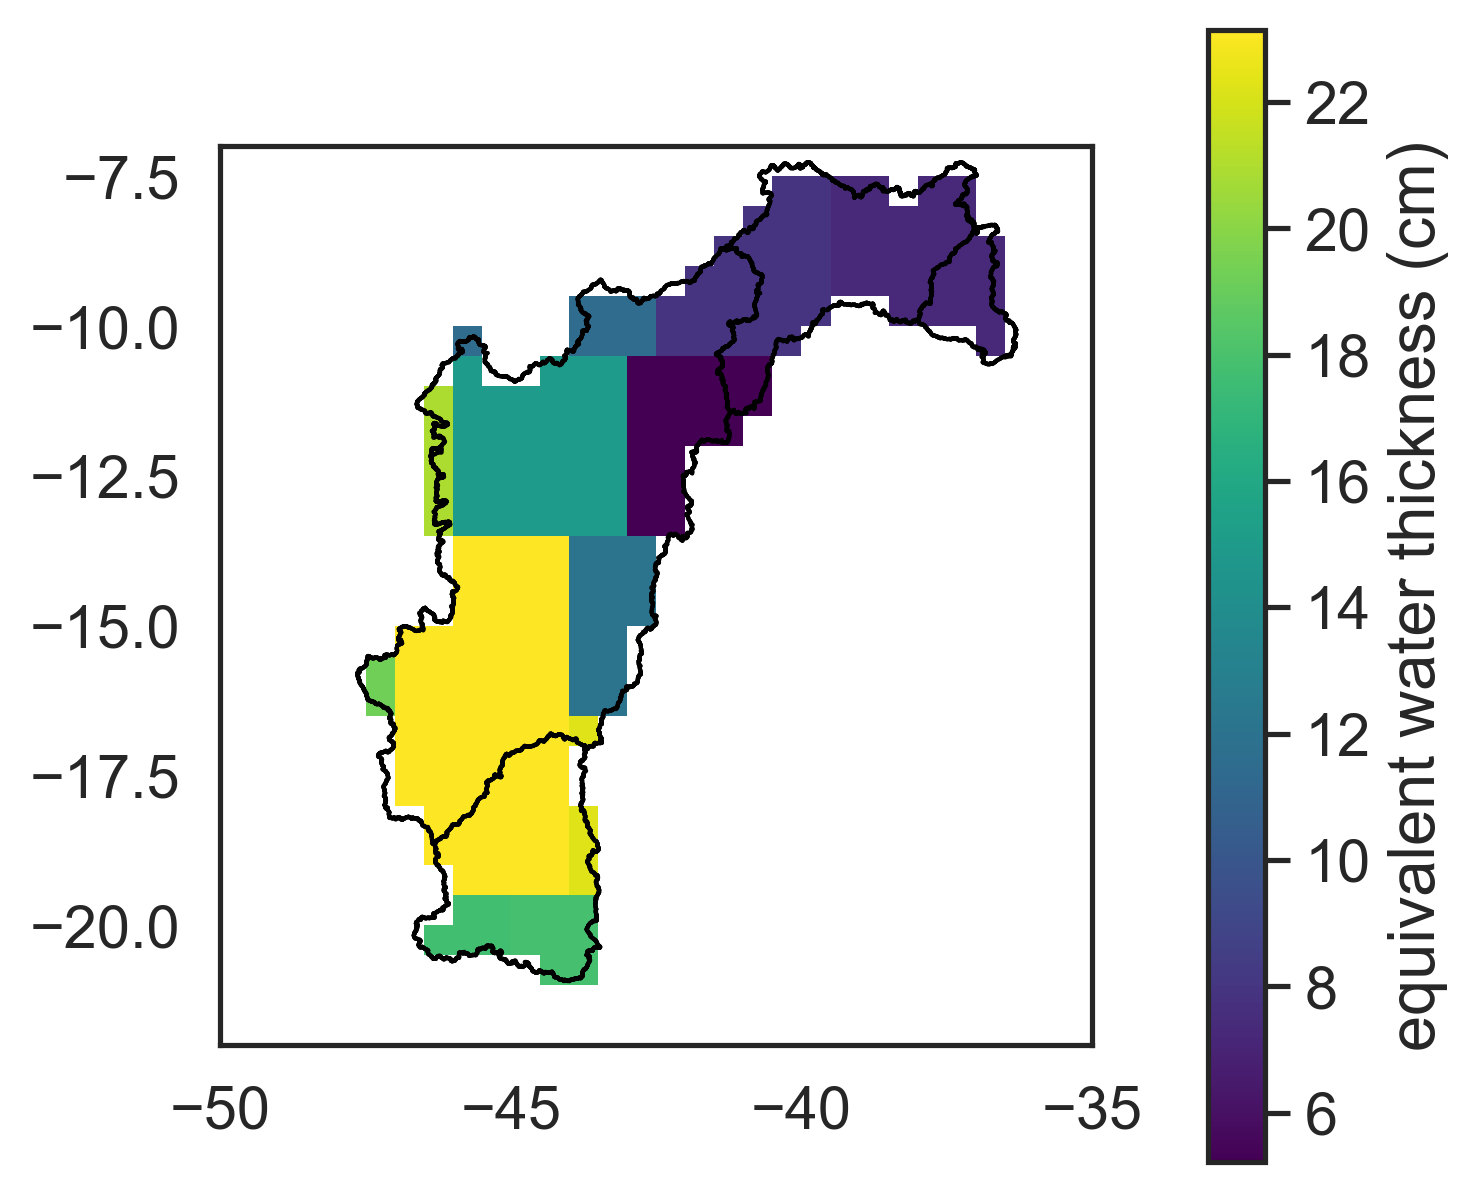

In [267]:
# Plot map with only the standard deviation --> variation in water availablitity in the region
jpl_std = jpl_masked.std(dim="time",skipna=True)

f, ax = plt.subplots(figsize=[5,5], dpi=300)
jpl_std.plot(ax=ax,cmap="viridis", cbar_kwargs={
        "orientation": "vertical",
        "label": "equivalent water thickness (cm)",
        "pad": 0.1,})
#cbar=plt.colorbar(label="stdv")
sf_full.plot(ax=ax, edgecolor='black', facecolor='none')
sf_all.plot(ax=ax, facecolor='none', edgecolor='black')
plt.title('')
#cbar = plt.colorbar()
plt.ylabel('')
plt.xlabel('')
ax.set(xlim=(-50, -35), ylim=(-22, -7))
plt.show()

# saves figure in same directory as the code file
f.savefig('mapa_grace_stdv.png',bbox_inches='tight')

#### Time-series plotting

In [268]:
# creates a uniform spacial grid on which to plot the area data (given that dates were not plotting correctly)
start = pd.Timestamp('1985-01-02')
end = pd.Timestamp('2020-12-02')
t = np.linspace(start.value, end.value, len(sfA))
t = pd.to_datetime(t)

In [269]:
# create spatial mean of GRACE data using xarray function
# change xarray to dataframe
jpl_mean = jpl_masked.mean(["lat", "lon"])
jpl_mean = jpl_mean.to_dataframe()
jpl_mean.reset_index(inplace=True)


In [270]:
# Add a COUNT a trendline for sfA
sfA['Count'] = np.arange(0,len(sfA),1)
sfA_bai['Count'] = np.arange(0,len(sfA_bai),1)
sfA_sub['Count'] = np.arange(0,len(sfA_sub),1)
sfA_med['Count'] = np.arange(0,len(sfA_med),1)
sfA_alt['Count'] = np.arange(0,len(sfA_alt),1)
sfA

/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1437720102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_bai['Count'] = np.arange(0,len(sfA_bai),1)
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1437720102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_sub['Count'] = np.arange(0,len(sfA_sub),1)
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1437720102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Data         Area        Trend  Count
0   1985-01-02 00:00:00+00:00  707264.2301  796638.3808      0
1   1985-02-02 00:00:00+00:00  733375.1465  808627.9774      1
2   1985-03-02 00:00:00+00:00  777225.9694  821245.4659      2
3   1985-04-02 00:00:00+00:00  761481.1569  833484.8256      3
4   1985-05-02 00:00:00+00:00  813214.4370  840374.2218      4
5   1985-06-02 00:00:00+00:00  744743.1072  840307.9101      5
6   1985-07-02 00:00:00+00:00  771821.4435  833175.1616      6
7   1985-08-02 00:00:00+00:00  791214.9400  820357.6633      7
8   1985-09-02 00:00:00+00:00  792705.5406  805400.8017      8
9   1985-10-02 00:00:00+00:00  723188.5065  792675.7605      9
10  1985-11-02 00:00:00+00:00  652551.2244  784755.6700     10
11  1985-12-02 00:00:00+00:00  656012.8137  784073.9861     11
12  1986-01-02 00:00:00+00:00  736110.2290  790637.9903     12
13  1986-02-02 00:00:00+00:00  741271.5520  802627.5869     13
14  1986-03-02 00:00:00+00:00  760745.4167  815245.0753     14
15  1986-04-02 00:00:00+00:00  756734.6620  827484.4350     15
16  1986-05-02 00:00:00+00:00  793710.0271  834373.8312     16
17  1986-06-02 00:00:00+00:00  774993.6620  834307.5195     17
18  1986-07-02 00:00:00+00:00  772779.2123  827174.7710     18
19  1986-08-02 00:00:00+00:00  790645.5488  814357.2727     19
20  1986-09-02 00:00:00+00:00  791524.2738  799400.4111     20
21  1986-10-02 00:00:00+00:00  748813.6911  786675.3700     21
22  1986-11-02 00:00:00+00:00  685975.0718  778755.2794     22
23  1986-12-02 00:00:00+00:00  689304.1927  778073.5955     23
24  1987-01-02 00:00:00+00:00  660142.7948  784637.5997     24
25  1987-02-02 00:00:00+00:00  666890.8049  796627.1963     25
26  1987-03-02 00:00:00+00:00  648054.1958  809244.6847     26
27  1987-04-02 00:00:00+00:00  657406.4438  821484.0444     27
28  1987-05-02 00:00:00+00:00  668631.1769  828373.4406     28
29  1987-06-02 00:00:00+00:00  657491.4163  828307.1290     29
30  1987-07-02 00:00:00+00:00  657722.4474  821174.3805     30
31  1987-08-02 00:00:00+00:00  671956.7174  808356.8821     31
32  1987-09-02 00:00:00+00:00  677735.5166  793400.0206     32
33  1987-10-02 00:00:00+00:00  669757.1611  780674.9794     33
34  1987-11-02 00:00:00+00:00  652039.4130  772754.8888     34
35  1987-12-02 00:00:00+00:00  654070.1951  772073.2049     35
36  1988-01-02 00:00:00+00:00  759155.8041  778637.2091     36
37  1988-02-02 00:00:00+00:00  764529.3814  790626.8057     37
38  1988-03-02 00:00:00+00:00  759066.7273  803686.9206     38
39  1988-04-02 00:00:00+00:00  762402.3200  815807.3252     39
40  1988-05-02 00:00:00+00:00  756258.7957  822490.9917     40
41  1988-06-02 00:00:00+00:00  748409.7647  822176.0067     41
42  1988-07-02 00:00:00+00:00  754974.9937  814832.1974     42
43  1988-08-02 00:00:00+00:00  758323.2723  801886.2175     43
44  1988-09-02 00:00:00+00:00  766429.4471  786927.0758     44
45  1988-10-02 00:00:00+00:00  758837.2588  774320.8642     45
46  1988-11-02 00:00:00+00:00  732374.6600  766615.3961     46
47  1988-12-02 00:00:00+00:00  740223.7439  766174.6018     47
48  1989-01-02 00:00:00+00:00  708280.7010  772954.4411     48
49  1989-02-02 00:00:00+00:00  714667.0642  785066.9776     49
50  1989-03-02 00:00:00+00:00  706774.2023  797686.5300     50
51  1989-04-02 00:00:00+00:00  714640.6765  809806.9346     51
52  1989-05-02 00:00:00+00:00  718240.7566  816490.6011     52
53  1989-06-02 00:00:00+00:00  715504.9748  816175.6161     53
54  1989-07-02 00:00:00+00:00  720384.8360  808831.8068     54
55  1989-08-02 00:00:00+00:00  719076.2466  795885.8269     55
56  1989-09-02 00:00:00+00:00  732679.5059  780926.6853     56
57  1989-10-02 00:00:00+00:00  724242.2113  768320.4736     57
58  1989-11-02 00:00:00+00:00  686813.7914  760615.0055     58
59  1989-12-02 00:00:00+00:00  701550.2429  760174.2112     59
60  1990-01-02 00:00:00+00:00  816961.8806  766954.0505     60
61  1990-02-02 00:00:00+00:00  846115.3483  779066.5870     61
62  1990-03-02 00:00:00+00:00  862941.1916  791686.1394 

y=-5.022093x+(8165.712354)
y=-0.152482x+(4.350678)


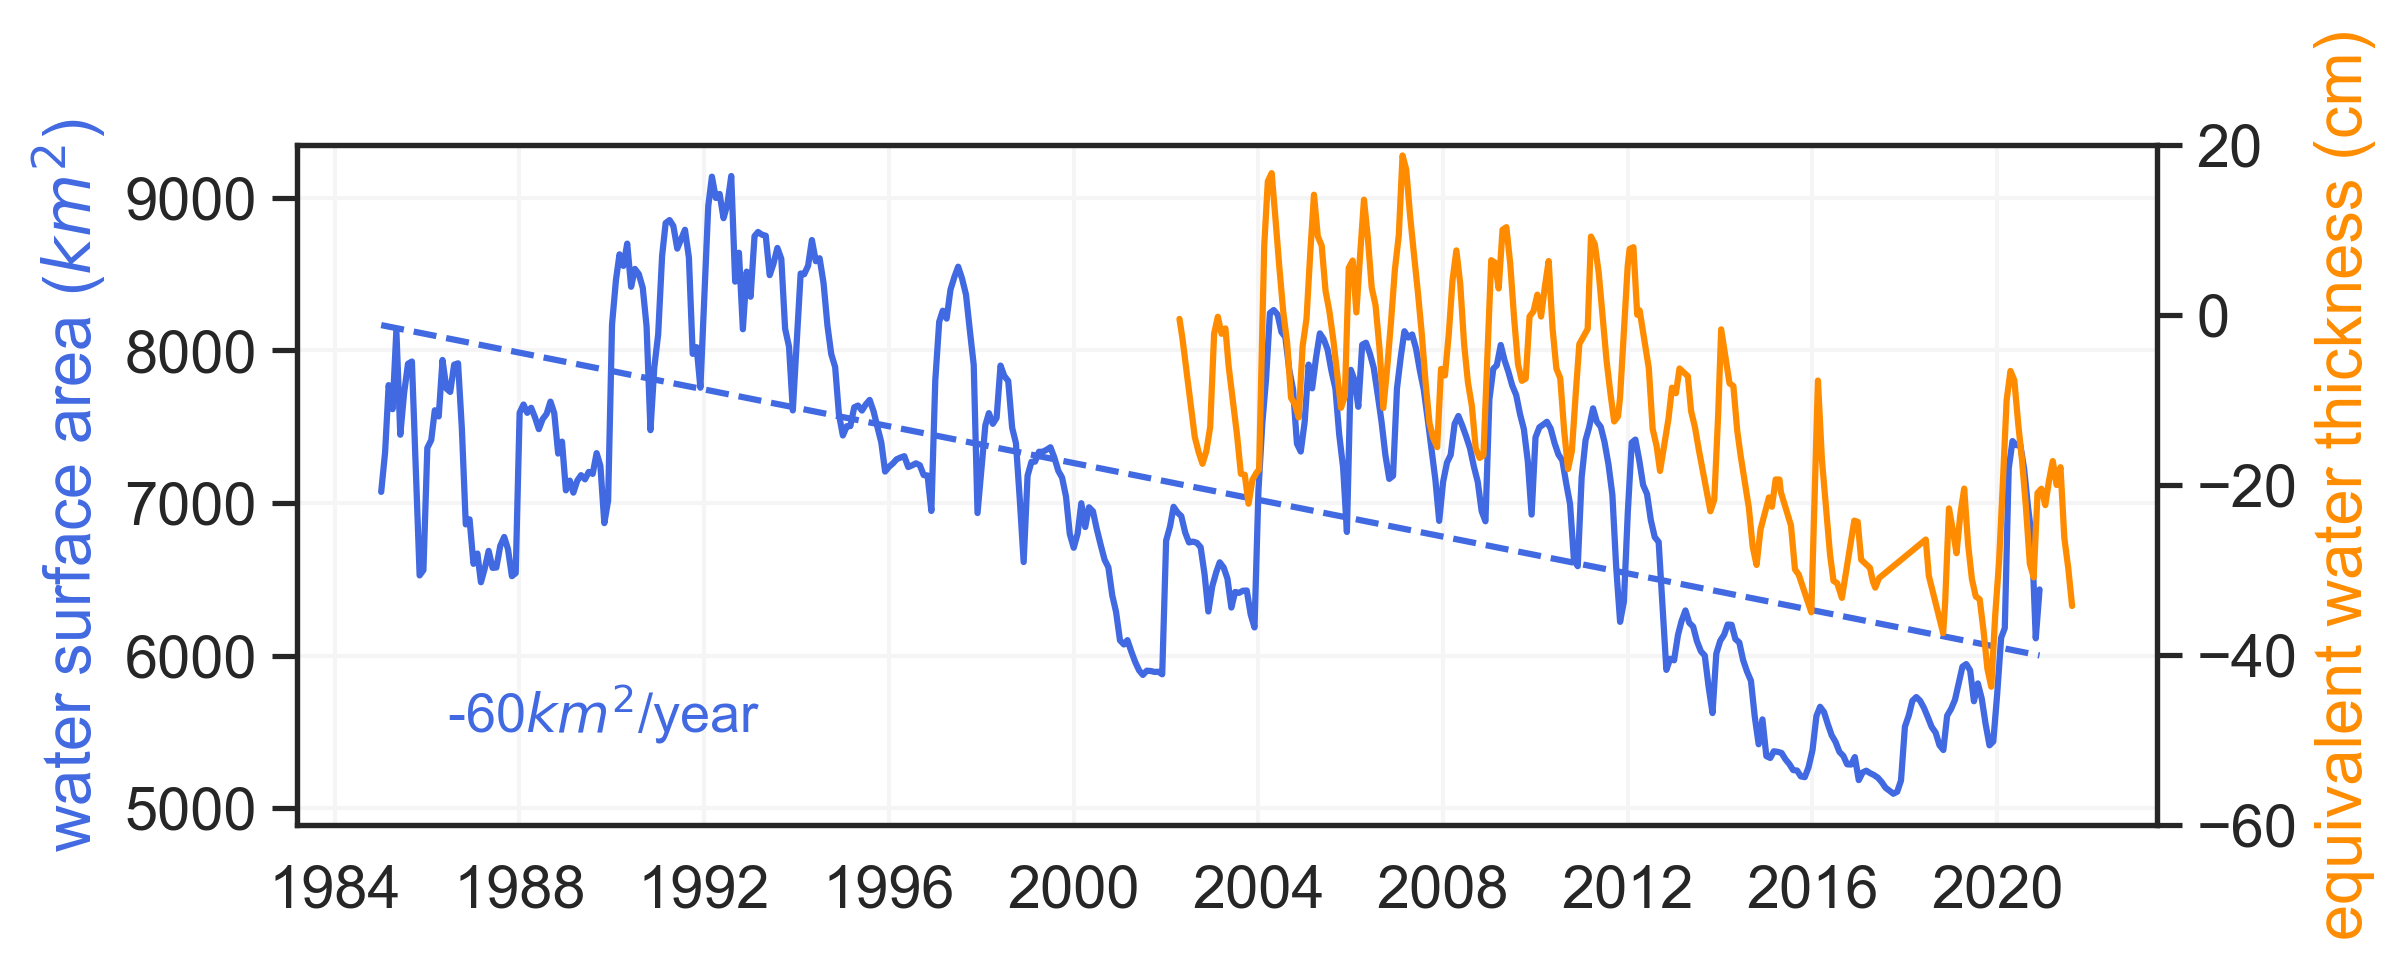

In [208]:
f, ax = plt.subplots(figsize=[8,3], dpi=300)

# Plot water surface

# make a plot with different y-axis using second axis object
plt.grid('both', color='whitesmoke')
ax.plot(sfA["Data"], sfA["Area"]/100,color="royalblue")
ax.set_ylabel("water surface area ($km^2$)",color="royalblue")
#ax.set(ylim=(5000, 100000))


# trendline (it is simply a linear fitting)
z = np.polyfit(sfA["Count"], sfA["Area"]/100, 1)
p = np.poly1d(z)
ax.plot(sfA["Data"],p(sfA["Count"]),'--',color="royalblue")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.text(6000, 0.55*10**4, '-60$km^2$/year', fontdict=None, fontsize='small', color='royalblue')

# Plot GRACE data

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# jpl_mean.plot(ax=ax, marker=".", color="silver", markerfacecolor="royalblue",markeredgecolor="royalblue")
ax2.plot(jpl_mean.time,jpl_mean.lwe_thickness, color="darkorange")
plt.title('')
plt.ylabel('equivalent water thickness (cm)', color="darkorange")
plt.xlabel('')
ax2.set(ylim=(-60, 20))

# trendline (it is simply a linear fitting)
z = np.polyfit(jpl_mean.index, jpl_mean.lwe_thickness, 1)
p = np.poly1d(z)
# ax.plot(jpl_mean.time,p(jpl_mean.time),'--',color="royalblue")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.show()

# saves figure in same directory as the code file
f.savefig('sf_full_timeseries.png',bbox_inches='tight')


In [271]:
# create spatial mean of Sub-Basins! GRACE data using xarray function
# change xarray to dataframe
jpl_bai_mean = jpl_bai_masked.mean(["lat", "lon"])
jpl_bai_mean = jpl_bai_mean.to_dataframe()
jpl_bai_mean.reset_index(inplace=True)

jpl_sub_mean = jpl_sub_masked.mean(["lat", "lon"])
jpl_sub_mean = jpl_sub_mean.to_dataframe()
jpl_sub_mean.reset_index(inplace=True)

jpl_med_mean = jpl_med_masked.mean(["lat", "lon"])
jpl_med_mean = jpl_med_mean.to_dataframe()
jpl_med_mean.reset_index(inplace=True)

jpl_alt_mean = jpl_alt_masked.mean(["lat", "lon"])
jpl_alt_mean = jpl_alt_mean.to_dataframe()
jpl_alt_mean.reset_index(inplace=True)

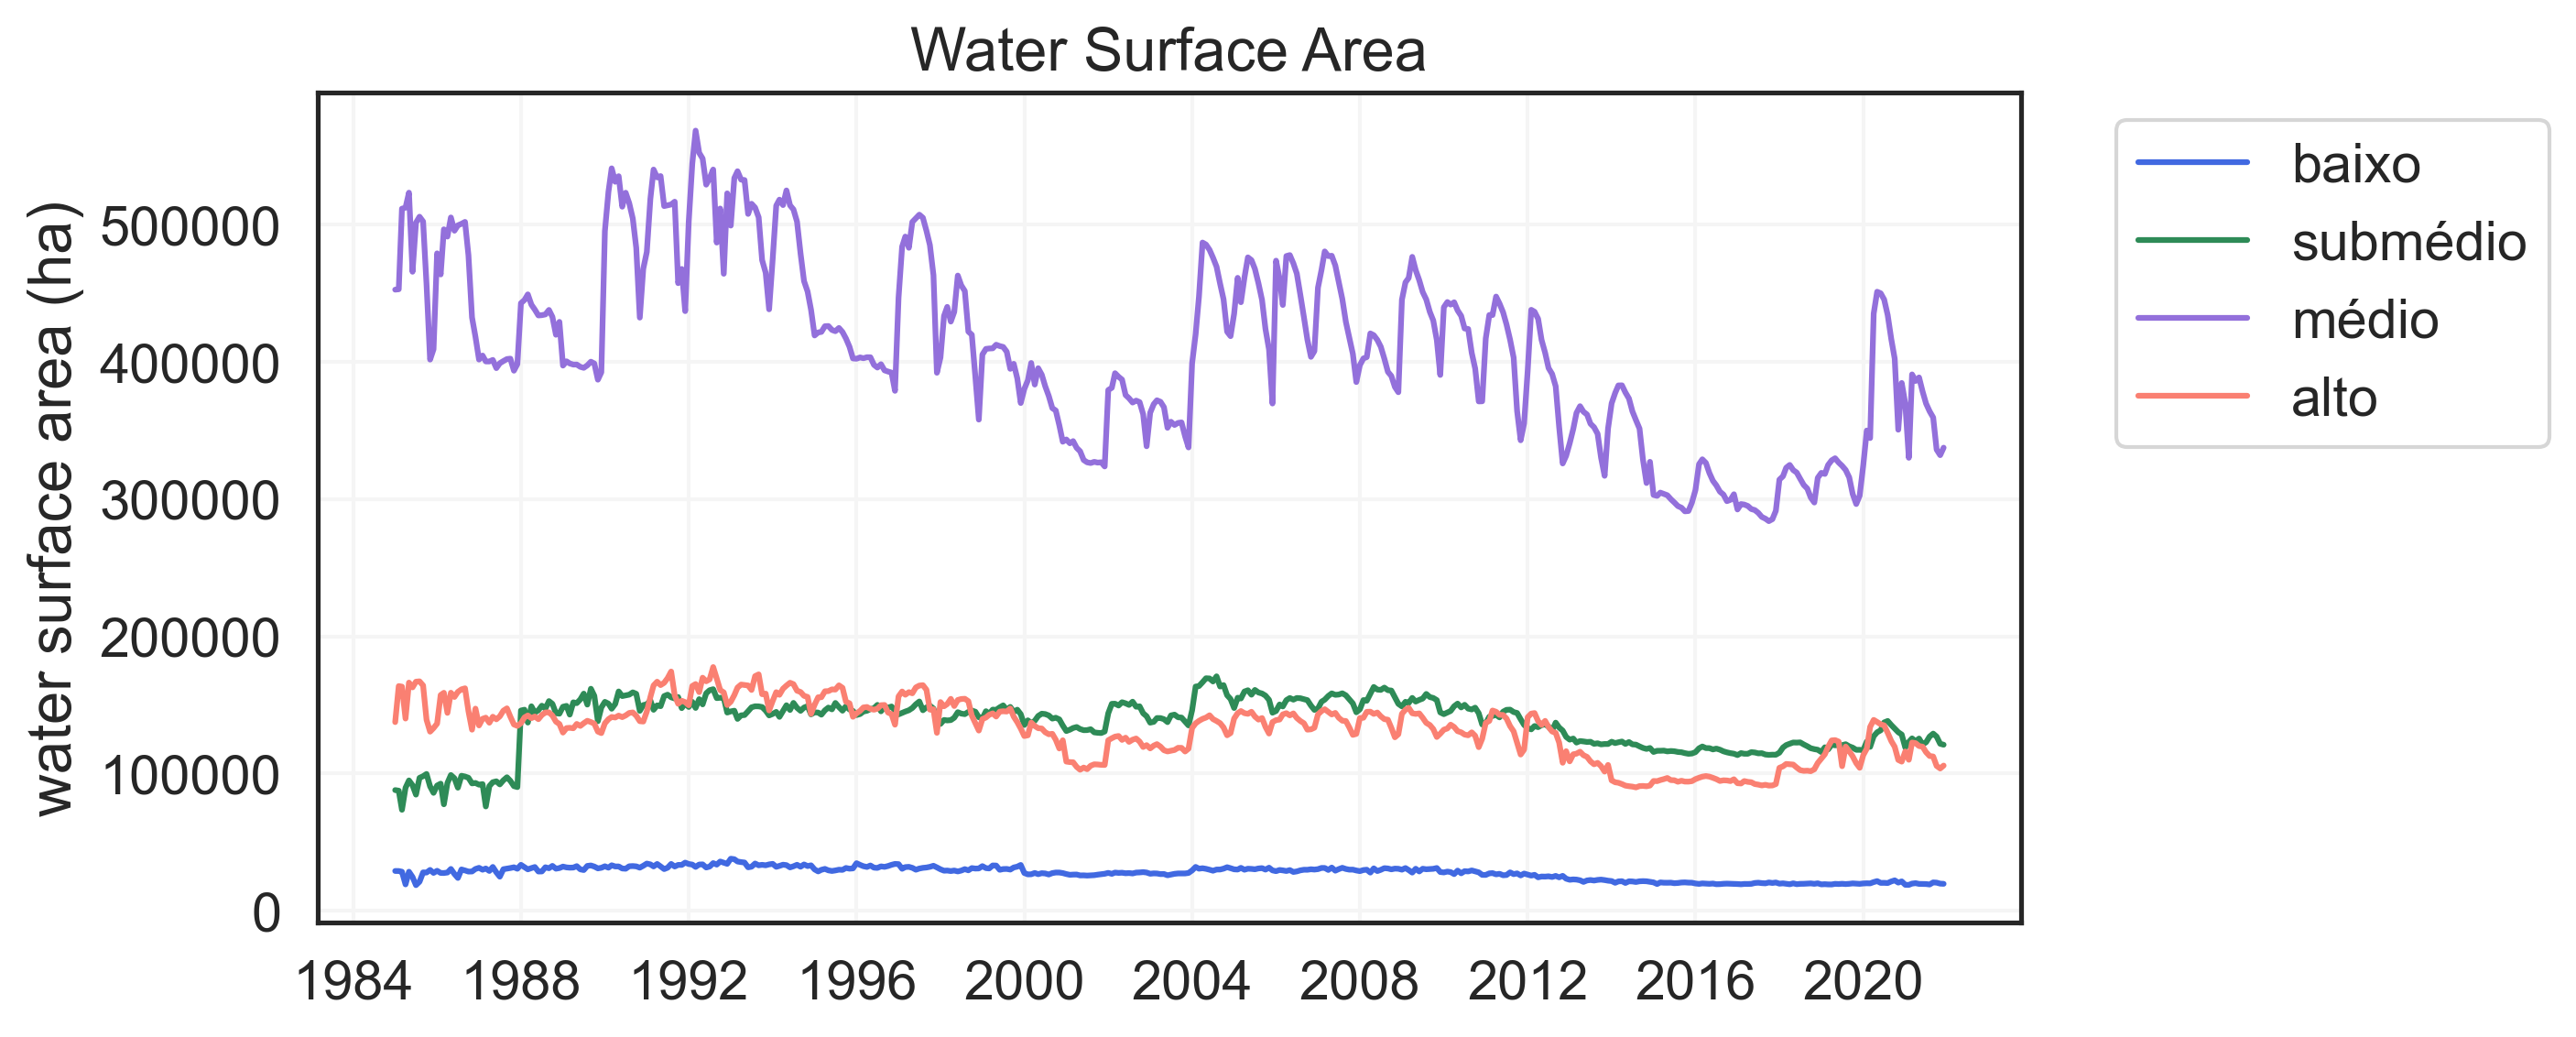

In [210]:
f, ax = plt.subplots(figsize=[8,4], dpi=300)

# Plot water surface area for different regions
plt.grid('both', color='whitesmoke')
ax.plot(sfA_bai["date"], sfA_bai["area_ha"],color="royalblue",label='baixo')
ax.plot(sfA_bai["date"], sfA_sub["area_ha"],color="seagreen",label='submédio')
ax.plot(sfA_bai["date"], sfA_med["area_ha"],color="mediumpurple",label='médio')
ax.plot(sfA_bai["date"], sfA_alt["area_ha"],color="salmon",label='alto')
ax.set_ylabel("water surface area (ha)")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Water Surface Area")
plt.xlabel('')

plt.show()

# saves figure in same directory as the code file
f.savefig('sf_area_timeseries.png',bbox_inches='tight')

In [211]:
sfA_sub_plot = sfA_sub.truncate(before=145)
sfA_sub

code                    name       date        area_ha  Count
1     10627  Submédio São Francisco 1985-01-01   87858.774461      0
5     10627  Submédio São Francisco 1985-02-01   87421.587095      1
9     10627  Submédio São Francisco 1985-03-01   73523.937260      2
13    10627  Submédio São Francisco 1985-04-01   89535.476175      3
17    10627  Submédio São Francisco 1985-05-01   94913.030656      4
21    10627  Submédio São Francisco 1985-06-01   91374.279803      5
25    10627  Submédio São Francisco 1985-07-01   84558.532001      6
29    10627  Submédio São Francisco 1985-08-01   96785.386220      7
33    10627  Submédio São Francisco 1985-09-01   97999.024296      8
37    10627  Submédio São Francisco 1985-10-01   99617.450897      9
41    10627  Submédio São Francisco 1985-11-01   90547.044024     10
45    10627  Submédio São Francisco 1985-12-01   85838.197974     11
49    10627  Submédio São Francisco 1986-01-01   91184.271173     12
53    10627  Submédio São Francisco 1986-02-01   92550.242844     13
57    10627  Submédio São Francisco 1986-03-01   77521.500458     14
61    10627  Submédio São Francisco 1986-04-01   93082.320257     15
65    10627  Submédio São Francisco 1986-05-01   98839.316317     16
69    10627  Submédio São Francisco 1986-06-01   96502.278255     17
73    10627  Submédio São Francisco 1986-07-01   89615.664290     18
77    10627  Submédio São Francisco 1986-08-01   98309.859606     19
81    10627  Submédio São Francisco 1986-09-01   97764.917802     20
85    10627  Submédio São Francisco 1986-10-01   96842.744481     21
89    10627  Submédio São Francisco 1986-11-01   92759.548437     22
93    10627  Submédio São Francisco 1986-12-01   93049.807998     23
97    10627  Submédio São Francisco 1987-01-01   91821.324537     24
101   10627  Submédio São Francisco 1987-02-01   92230.532884     25
105   10627  Submédio São Francisco 1987-03-01   75946.038200     26
109   10627  Submédio São Francisco 1987-04-01   90796.020228     27
113   10627  Submédio São Francisco 1987-05-01   93598.314380     28
117   10627  Submédio São Francisco 1987-06-01   94276.688634     29
121   10627  Submédio São Francisco 1987-07-01   92011.903075     30
125   10627  Submédio São Francisco 1987-08-01   95006.001159     31
129   10627  Submédio São Francisco 1987-09-01   97221.880561     32
133   10627  Submédio São Francisco 1987-10-01   94597.982426     33
137   10627  Submédio São Francisco 1987-11-01   90757.792962     34
141   10627  Submédio São Francisco 1987-12-01   90054.560802     35
145   10627  Submédio São Francisco 1988-01-01  145844.535915     36
149   10627  Submédio São Francisco 1988-02-01  146469.843079     37
153   10627  Submédio São Francisco 1988-03-01  137073.977127     38
157   10627  Submédio São Francisco 1988-04-01  148948.066357     39
161   10627  Submédio São Francisco 1988-05-01  144399.294880     40
165   10627  Submédio São Francisco 1988-06-01  146059.562969     41
169   10627  Submédio São Francisco 1988-07-01  149384.369414     42
173   10627  Submédio São Francisco 1988-08-01  147214.891750     43
177   10627  Submédio São Francisco 1988-09-01  152730.910079     44
181   10627  Submédio São Francisco 1988-10-01  150732.266625     45
185   10627  Submédio São Francisco 1988-11-01  143891.252565     46
189   10627  Submédio São Francisco 1988-12-01  143579.651454     47
193   10627  Submédio São Francisco 1989-01-01  148617.596956     48
197   10627  Submédio São Francisco 1989-02-01  149245.568354     49
201   10627  Submédio São Francisco 1989-03-01  142901.545661     50
205   10627  Submédio São Francisco 1989-04-01  151837.243190     51
209   10627  Submédio São Francisco 1989-05-01  151223.942903     52
213   10627  Submédio São Francisco 1989-06-01  153962.020943     53
217   10627  Submédio São Francisco 1989-07-01  158164.905636     54
221   10627  Submédio São Francisco 1989-08-01  150178.267257     55
225   10627  Submédio São Francisco 1989-09-01  161732.643067     56
229  

y=-0.800279x+(1595.493879)
y=-0.060459x+(-0.066175)


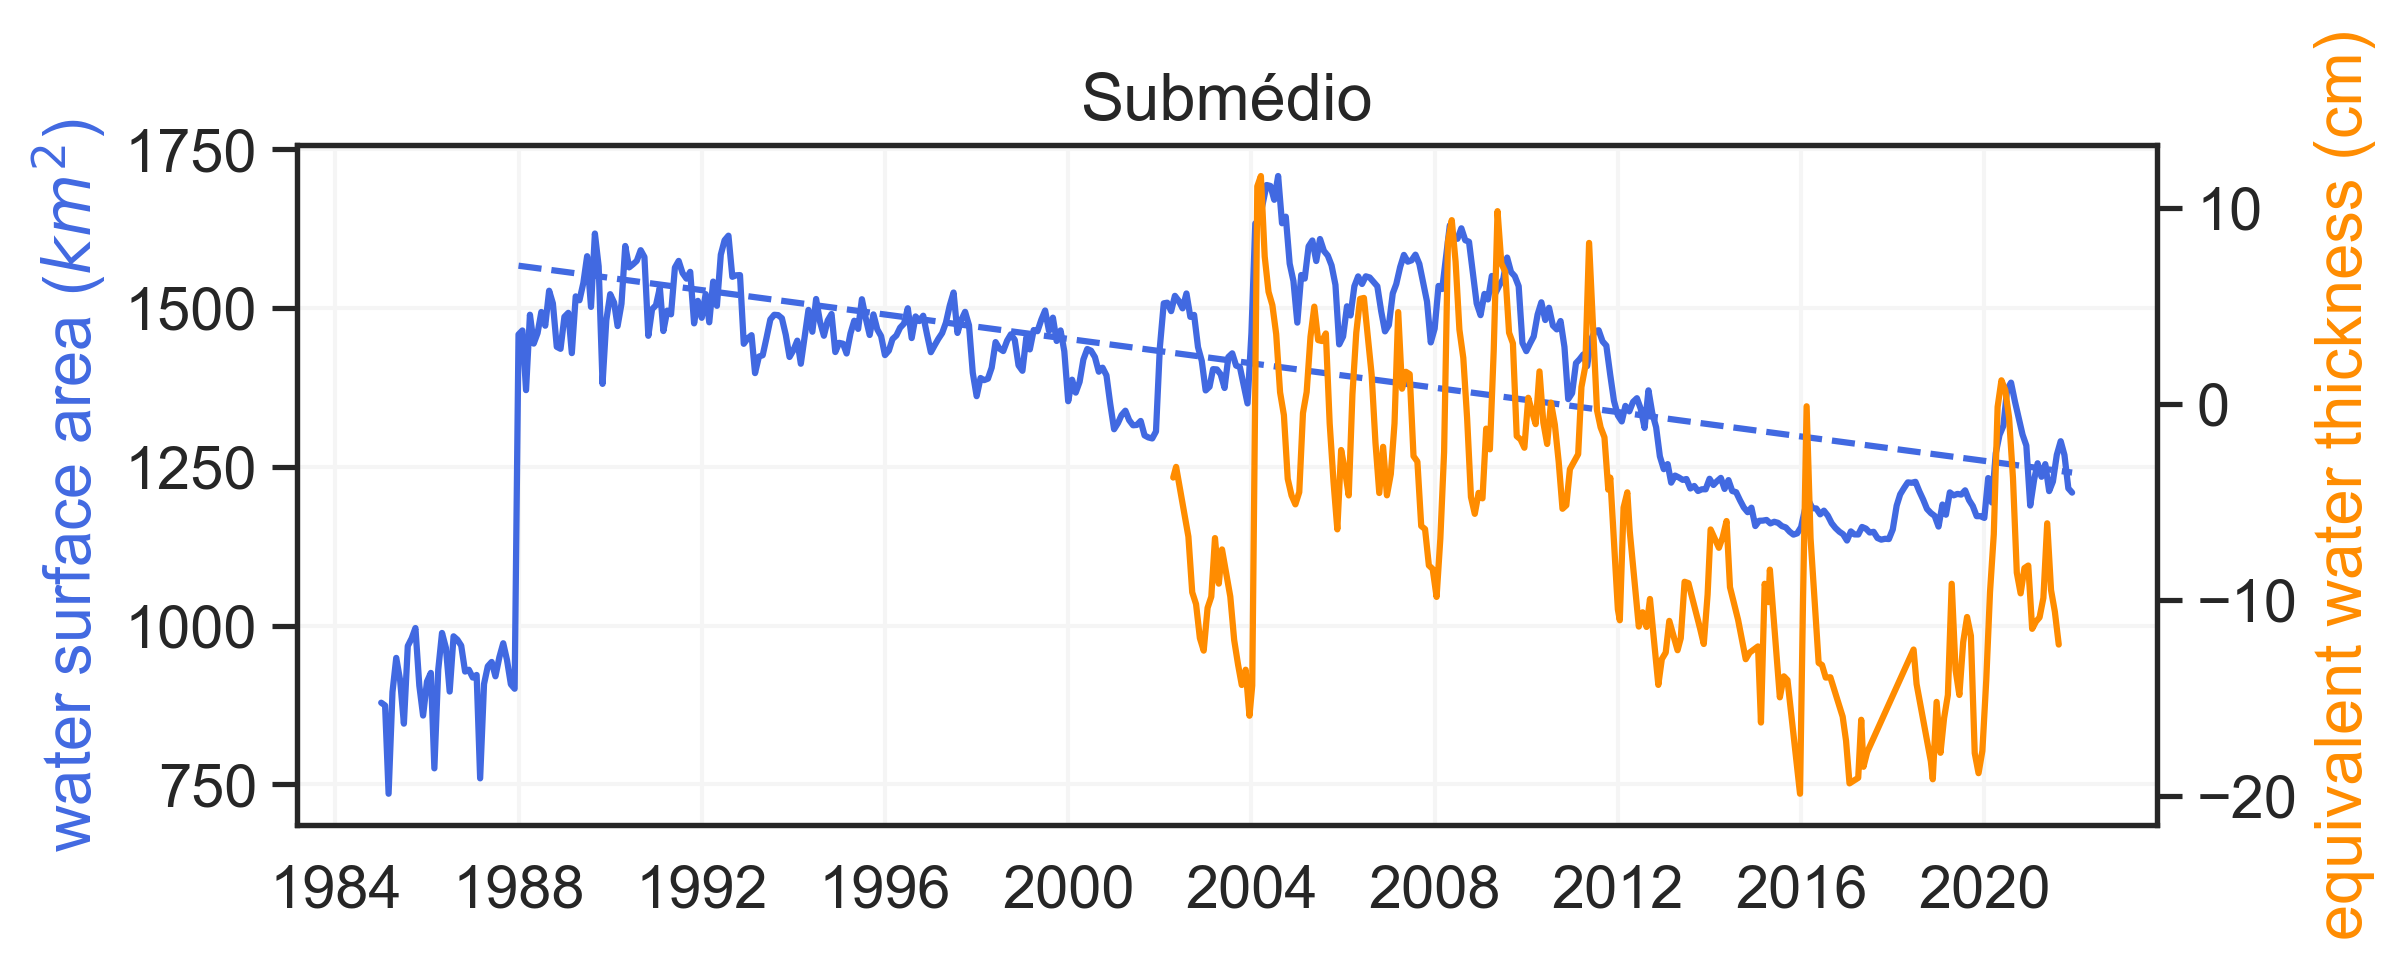

In [242]:
sns.set_style("white")
f, ax = plt.subplots(figsize=[8,3], dpi=300)

# make a plot with different y-axis using second axis object
plt.grid('both', color='whitesmoke')
ax.plot(sfA_sub["date"], sfA_sub["area_ha"]/100,color="royalblue")
ax.set_ylabel("water surface area ($km^2$)",color="royalblue")
#ax.set(ylim=(500000, 1000000))

# trendline (it is simply a linear fitting)
z = np.polyfit(sfA_sub_plot["Count"], sfA_sub_plot["area_ha"]/100, 1)
p = np.poly1d(z)
ax.plot(sfA_sub_plot["date"],p(sfA_sub_plot["Count"]),'--',color="royalblue")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# jpl_mean.plot(ax=ax, marker=".", color="silver", markerfacecolor="royalblue",markeredgecolor="royalblue")
ax2.plot(jpl_sub_mean.time,jpl_sub_mean.lwe_thickness, color="darkorange")
plt.title("Submédio")
plt.ylabel('equivalent water thickness (cm)', color="darkorange")
plt.xlabel('')
# ax2.set(ylim=(-80, 40))

# trendline (it is simply a linear fitting)
z = np.polyfit(jpl_sub_mean.index, jpl_sub_mean.lwe_thickness, 1)
p = np.poly1d(z)
# ax.plot(jpl_mean.time,p(jpl_mean.time),'--',color="royalblue")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.show()

# saves figure in same directory as the code file
f.savefig('sf_sub_timeseries.png',bbox_inches='tight')

In [213]:
sfA_bai['Count'] = np.arange(0,len(sfA_bai),1)
sfA_sub['Count'] = np.arange(0,len(sfA_sub),1)
sfA_med['Count'] = np.arange(0,len(sfA_med),1)
sfA_alt['Count'] = np.arange(0,len(sfA_alt),1)


/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1833673624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_bai['Count'] = np.arange(0,len(sfA_bai),1)
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1833673624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_sub['Count'] = np.arange(0,len(sfA_sub),1)
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/1833673624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

#### Correlation plot between GRACE and water surface area
###### merge datasets so they in same grid

In [214]:
# Start by restructuring water surface data

# cut water surface data to same period as GRACE (roughly)
i = sfA[sfA.Data =="2002-04-02T00:00:00.000Z"].index.values
i = i[0]
iend = len(sfA)
sfA_cut = sfA.iloc[i:iend,:]

In [215]:
# same for sub-watersheds
# cut water surface data to same period as GRACE (roughly)

j = sfA_bai.loc[sfA_bai['date'] == "2002-04-01", 'Count'].iloc[0]
jend = sfA_bai.loc[sfA_bai['date'] == "2021-12-01", 'Count'].iloc[0]
sfA_bai_cut = sfA_bai.iloc[j:jend,:]

j = sfA_sub.loc[sfA_sub['date'] == "2002-04-01", 'Count'].iloc[0]
jend = sfA_sub.loc[sfA_sub['date'] == "2021-12-01", 'Count'].iloc[0]
sfA_sub_cut = sfA_sub.iloc[j:jend,:]

j = sfA_med.loc[sfA_med['date'] == "2002-04-01", 'Count'].iloc[0]
jend = sfA_med.loc[sfA_med['date'] == "2021-12-01", 'Count'].iloc[0]
sfA_med_cut = sfA_med.iloc[j:jend,:]

j = sfA_alt.loc[sfA_alt['date'] == "2002-04-01", 'Count'].iloc[0]
jend = sfA_alt.loc[sfA_alt['date'] == "2021-12-01", 'Count'].iloc[0]
sfA_alt_cut = sfA_alt.iloc[j:jend,:]

In [216]:
# fdate --> formated date with just year and month (relevant time indicators for merging)
sfA_cut["fdate"]=sfA_cut["Data"].dt.strftime('%Y-%m')
sfA_bai_cut["fdate"]=sfA_bai_cut["date"].dt.strftime('%Y-%m')
sfA_sub_cut["fdate"]=sfA_sub_cut["date"].dt.strftime('%Y-%m')
sfA_med_cut["fdate"]=sfA_med_cut["date"].dt.strftime('%Y-%m')
sfA_alt_cut["fdate"]=sfA_alt_cut["date"].dt.strftime('%Y-%m')

/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/3353314843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_cut["fdate"]=sfA_cut["Data"].dt.strftime('%Y-%m')
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/3353314843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfA_bai_cut["fdate"]=sfA_bai_cut["date"].dt.strftime('%Y-%m')
/var/folders/s9/3jg0s6mx1bb06h61dh7_v34c0000gn/T/ipykernel_7613/3353314843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [217]:
# add equivalent fdate variable to GRACE data
jpl_mean["fdate"]=jpl_mean["time"].dt.strftime('%Y-%m')
jpl_bai_mean["fdate"]=jpl_bai_mean["time"].dt.strftime('%Y-%m')
jpl_sub_mean["fdate"]=jpl_sub_mean["time"].dt.strftime('%Y-%m')
jpl_med_mean["fdate"]=jpl_med_mean["time"].dt.strftime('%Y-%m')
jpl_alt_mean["fdate"]=jpl_alt_mean["time"].dt.strftime('%Y-%m')

In [218]:
merged = pd.merge(left=sfA_cut, right=jpl_mean, how='left', left_on='fdate', right_on='fdate')
merged_bai = pd.merge(left=sfA_bai_cut, right=jpl_bai_mean, how='left', left_on='fdate', right_on='fdate')
merged_sub = pd.merge(left=sfA_sub_cut, right=jpl_sub_mean, how='left', left_on='fdate', right_on='fdate')
merged_med = pd.merge(left=sfA_med_cut, right=jpl_med_mean, how='left', left_on='fdate', right_on='fdate')
merged_alt = pd.merge(left=sfA_alt_cut, right=jpl_alt_mean, how='left', left_on='fdate', right_on='fdate')
merged_bai

code                 name       date       area_ha  Count    fdate  \
0    10626  Baixo São Francisco 2002-04-01  27494.702140    207  2002-04   
1    10626  Baixo São Francisco 2002-05-01  27632.188836    208  2002-05   
2    10626  Baixo São Francisco 2002-06-01  27249.675139    209  2002-06   
3    10626  Baixo São Francisco 2002-07-01  27400.606440    210  2002-07   
4    10626  Baixo São Francisco 2002-08-01  27106.363013    211  2002-08   
5    10626  Baixo São Francisco 2002-09-01  27744.374693    212  2002-09   
6    10626  Baixo São Francisco 2002-10-01  27850.626301    213  2002-10   
7    10626  Baixo São Francisco 2002-11-01  28076.873755    214  2002-11   
8    10626  Baixo São Francisco 2002-12-01  27777.322214    215  2002-12   
9    10626  Baixo São Francisco 2003-01-01  26893.372285    216  2003-01   
10   10626  Baixo São Francisco 2003-02-01  27158.642447    217  2003-02   
11   10626  Baixo São Francisco 2003-03-01  27075.697380    218  2003-03   
12   10626  Baixo São Francisco 2003-04-01  26637.356103    219  2003-04   
13   10626  Baixo São Francisco 2003-05-01  26696.760334    220  2003-05   
14   10626  Baixo São Francisco 2003-06-01  25773.792754    221  2003-06   
15   10626  Baixo São Francisco 2003-07-01  26261.820476    222  2003-07   
16   10626  Baixo São Francisco 2003-08-01  26824.844704    223  2003-08   
17   10626  Baixo São Francisco 2003-09-01  27100.899909    224  2003-09   
18   10626  Baixo São Francisco 2003-10-01  27115.819556    225  2003-10   
19   10626  Baixo São Francisco 2003-11-01  27111.613799    226  2003-11   
20   10626  Baixo São Francisco 2003-12-01  27463.346441    227  2003-12   
21   10626  Baixo São Francisco 2004-01-01  29300.250364    228  2004-01   
22   10626  Baixo São Francisco 2004-02-01  31862.443878    229  2004-02   
23   10626  Baixo São Francisco 2004-03-01  30580.873181    230  2004-03   
24   10626  Baixo São Francisco 2004-04-01  30903.638747    231  2004-04   
25   10626  Baixo São Francisco 2004-05-01  30475.968402    232  2004-05   
26   10626  Baixo São Francisco 2004-06-01  29822.763896    233  2004-06   
27   10626  Baixo São Francisco 2004-07-01  29097.192642    234  2004-07   
28   10626  Baixo São Francisco 2004-08-01  29968.002257    235  2004-08   
29   10626  Baixo São Francisco 2004-09-01  29979.719555    236  2004-09   
30   10626  Baixo São Francisco 2004-10-01  30606.330826    237  2004-10   
31   10626  Baixo São Francisco 2004-11-01  31651.415280    238  2004-11   
32   10626  Baixo São Francisco 2004-12-01  30937.103749    239  2004-12   
33   10626  Baixo São Francisco 2005-01-01  30108.364805    240  2005-01   
34   10626  Baixo São Francisco 2005-02-01  29954.080788    241  2005-02   
35   10626  Baixo São Francisco 2005-03-01  31194.894464    242  2005-03   
36   10626  Baixo São Francisco 2005-04-01  29826.896172    243  2005-04   
37   10626  Baixo São Francisco 2005-05-01  30558.633277    244  2005-05   
38   10626  Baixo São Francisco 2005-06-01  30421.488486    245  2005-06   
39   10626  Baixo São Francisco 2005-07-01  30139.274242    246  2005-07   
40   10626  Baixo São Francisco 2005-08-01  30745.286704    247  2005-08   
41   10626  Baixo São Francisco 2005-09-01  30972.624561    248  2005-09   
42   10626  Baixo São Francisco 2005-10-01  29910.746013    249  2005-10   
43   10626  Baixo São Francisco 2005-11-01  31305.641962    250  2005-11   
44   10626  Baixo São Francisco 2005-12-01  29339.394489    251  2005-12   
45   10626  Baixo São Francisco 2006-01-01  28776.457748    252  2006-01   
46   10626  Baixo São Francisco 2006-02-01  29639.561390    253  2006-02   
47   10626  Baixo São Francisco 2006-03-01  29334.359650    254  2006-03   
48   10626  Baixo São Francisco 2006-04-01  28889.474343    255  2006-04   
49   10626  Baixo São Francisco 2006-05-01  29557.345320    256  2006-05   
50   10626  Baixo São Francisco 2006-06-01  28191.893697    257  2006-06   
51   10626  Baixo São Francisco 2006-07-01  28604.6949

In [237]:
# compute statistics 

# trendline (linear fitting)
# [idx] excludes NaN
idx = np.isfinite(merged.Area) & np.isfinite(merged.lwe_thickness)
z = np.polyfit(merged.Area[idx], merged.lwe_thickness[idx], 1) 
p = np.poly1d(z)
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Pearson's coefficient (R) and R^2
r = np.corrcoef(merged.Area[idx],merged.lwe_thickness[idx])
r2 = r**2
print("r =",r)
print("r-squared =",r2)

y=0.000124x+(-94.146360)
r = [[1.         0.82475716]
 [0.82475716 1.        ]]
r-squared = [[1.         0.68022438]
 [0.68022438 1.        ]]


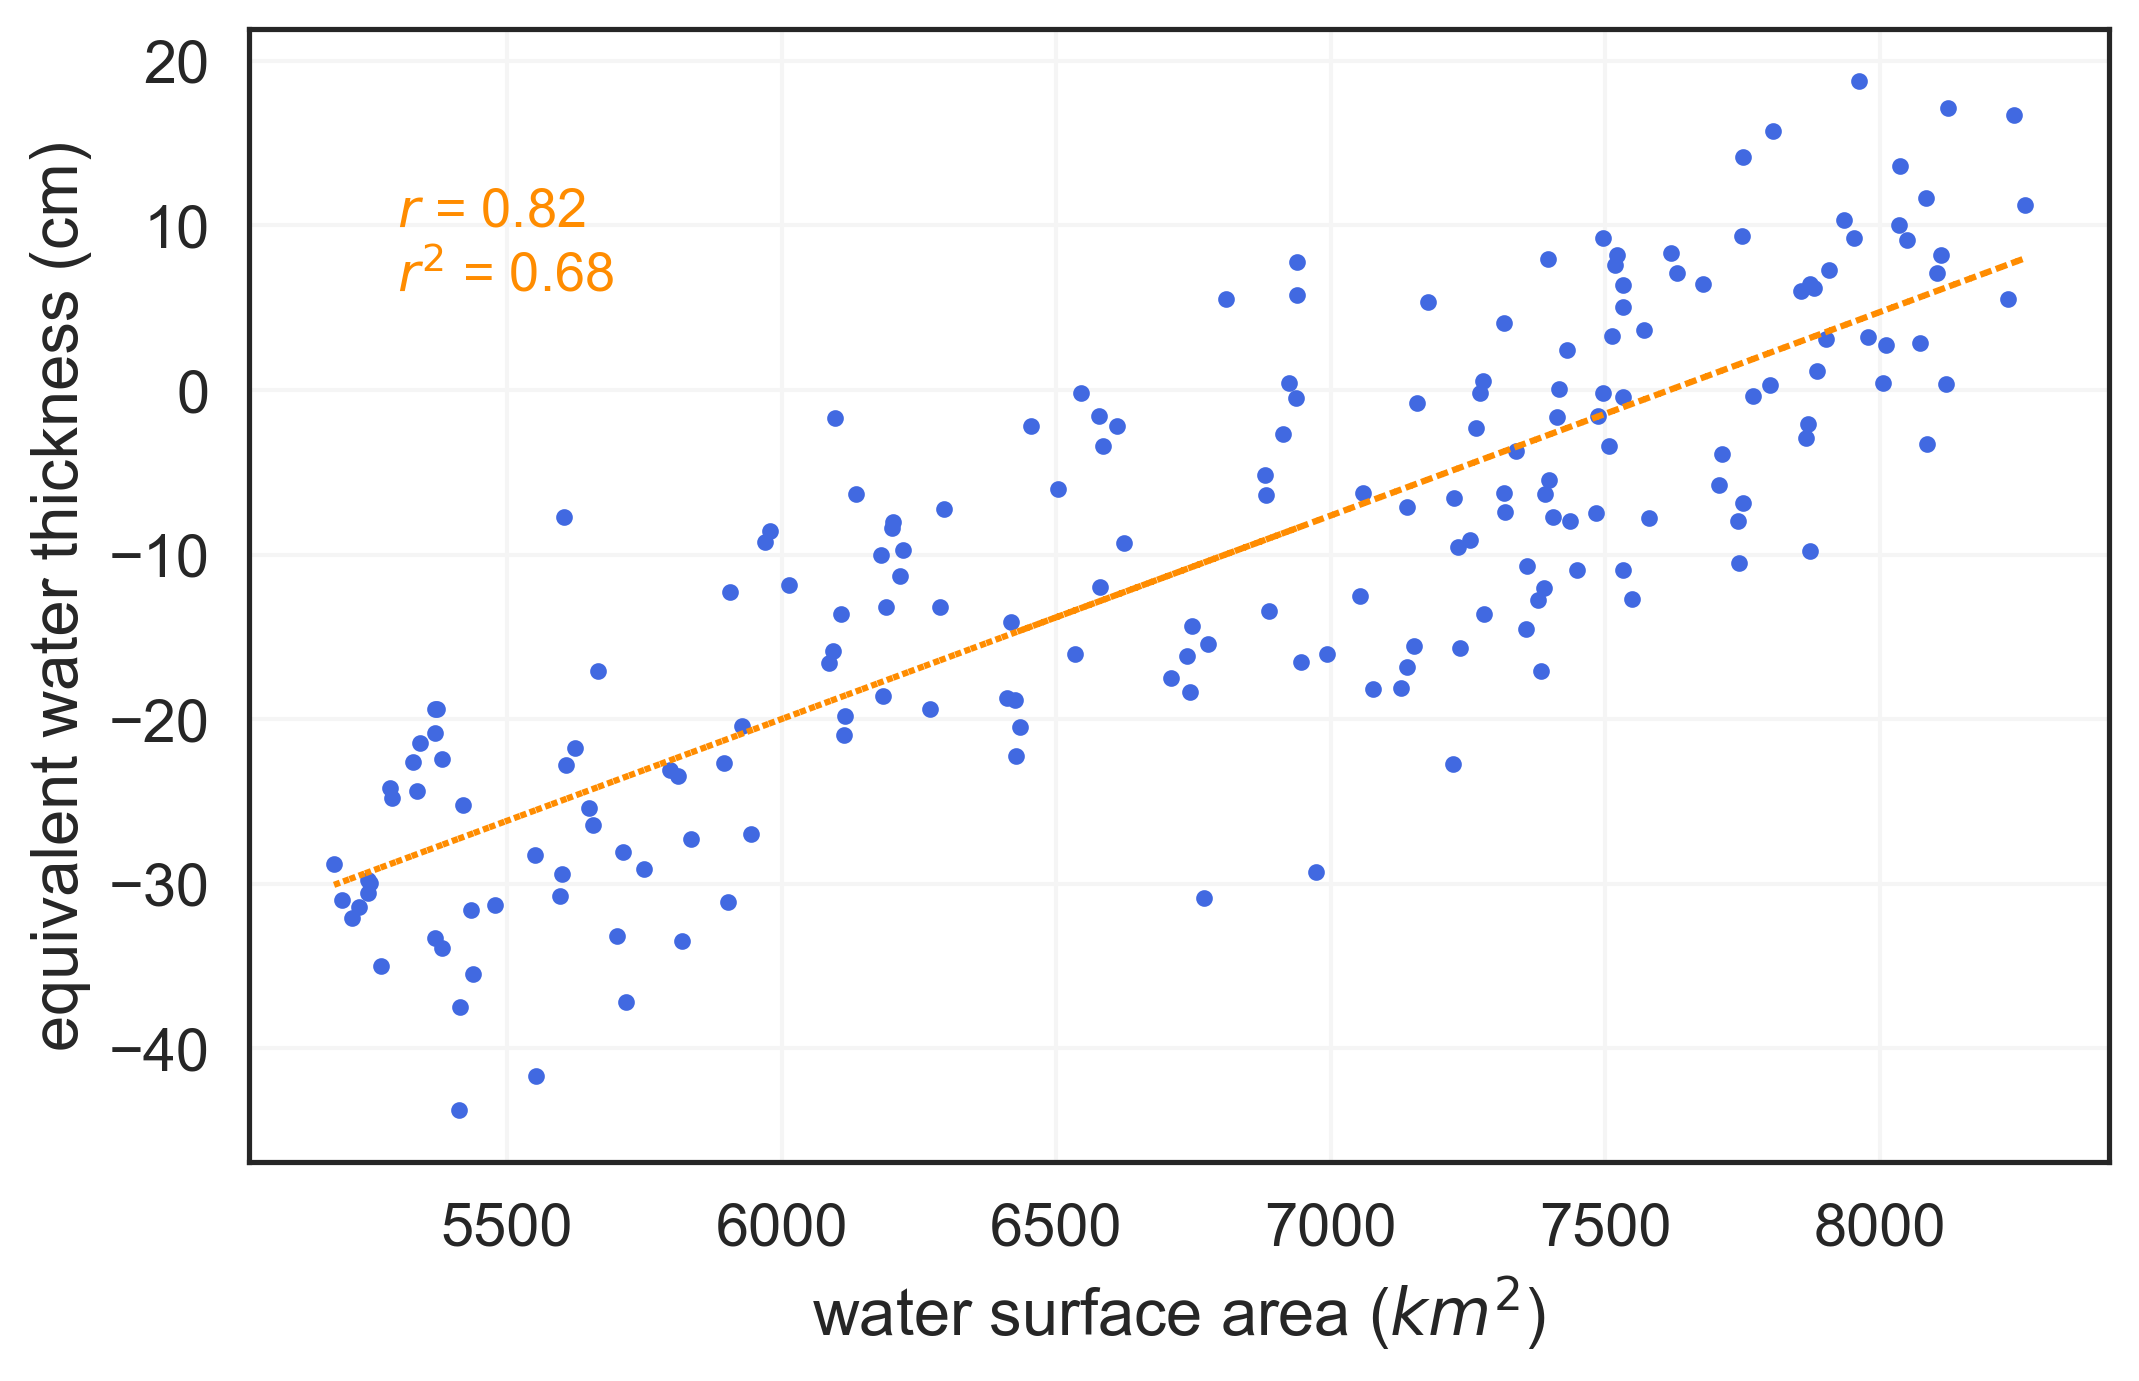

In [241]:
f, ax = plt.subplots(figsize=[8,5], dpi=300)

plt.grid('both', color='whitesmoke')
ax.scatter(merged.Area/100, merged.lwe_thickness, marker='.',color="royalblue")

# plot trendline (linear fitting)
ax.plot(merged.Area[idx]/100,p(merged.Area[idx]),':',color="darkorange")

# NOTE: r values come from above cell. CHECK if values change for caption and/or find a way to reference them in string
plt.text(0.53*10**4, 10,'$r$ = 0.82', fontdict=None, fontsize='small', color='darkorange')
plt.text(0.53*10**4, 6,'$r^2$ = 0.68', fontdict=None, fontsize='small', color='darkorange')

plt.title('')
plt.ylabel('equivalent water thickness (cm)')
plt.xlabel('water surface area ($km^2$)')
plt.show()

# saves figure in same directory as the code file
f.savefig('sf_comparison_scatter.png',bbox_inches='tight')

In [222]:
# trendline (linear fitting)
# [idx] excludes NaN
idx = np.isfinite(merged_sub.area_ha) & np.isfinite(merged_sub.lwe_thickness)
z = np.polyfit(merged_sub.area_ha[idx], merged_sub.lwe_thickness[idx], 1) 
p = np.poly1d(z)
ax.plot(merged_sub.area_ha[idx],p(merged_sub.area_ha[idx]),':',color="darkorange")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Pearson's coefficient (R) and R^2
r = np.corrcoef(merged_sub.area_ha[idx],merged_sub.lwe_thickness[idx])
r2 = r**2
print("r =",r)
print("r-squared =",r2)

y=0.000352x+(-54.849383)
r = [[1.         0.79756942]
 [0.79756942 1.        ]]
r-squared = [[1.         0.63611698]
 [0.63611698 1.        ]]


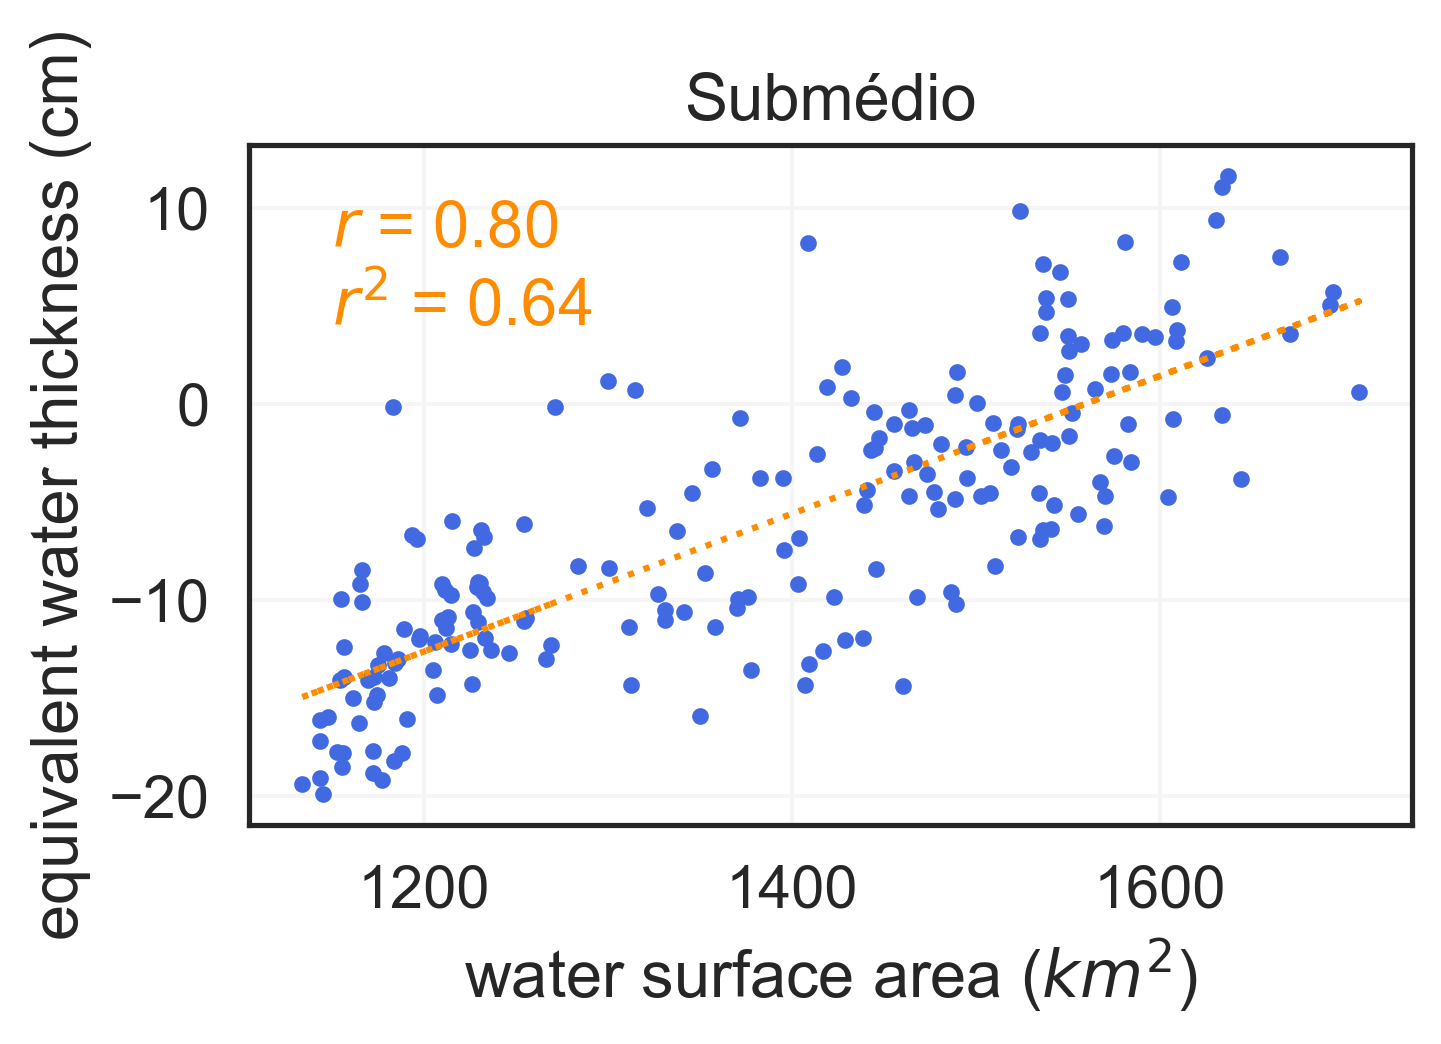

In [225]:
f, ax = plt.subplots(figsize=[5,3], dpi=300)

plt.grid('both', color='whitesmoke')
ax.scatter(merged_sub.area_ha/100, merged_sub.lwe_thickness, marker='.',color="royalblue")

# plot trendline (linear fitting)
ax.plot(merged_sub.area_ha[idx]/100,p(merged_sub.area_ha[idx]),':',color="darkorange")

# NOTE: r values come from above cell
# CHECK if values change for caption and/or find a way to reference them in string
plt.text(1150, 8,'$r$ = 0.80', fontdict=None, fontsize='medium', color='darkorange')
plt.text(1150, 4,'$r^2$ = 0.64', fontdict=None, fontsize='medium', color='darkorange')

plt.title("Submédio")
plt.ylabel('equivalent water thickness (cm)')
plt.xlabel('water surface area ($km^2$)')
plt.show()

# saves figure in same directory as the code file
f.savefig('sf_comparison_sub.png',bbox_inches='tight')

#### Monthly means // seasonal decomposition 

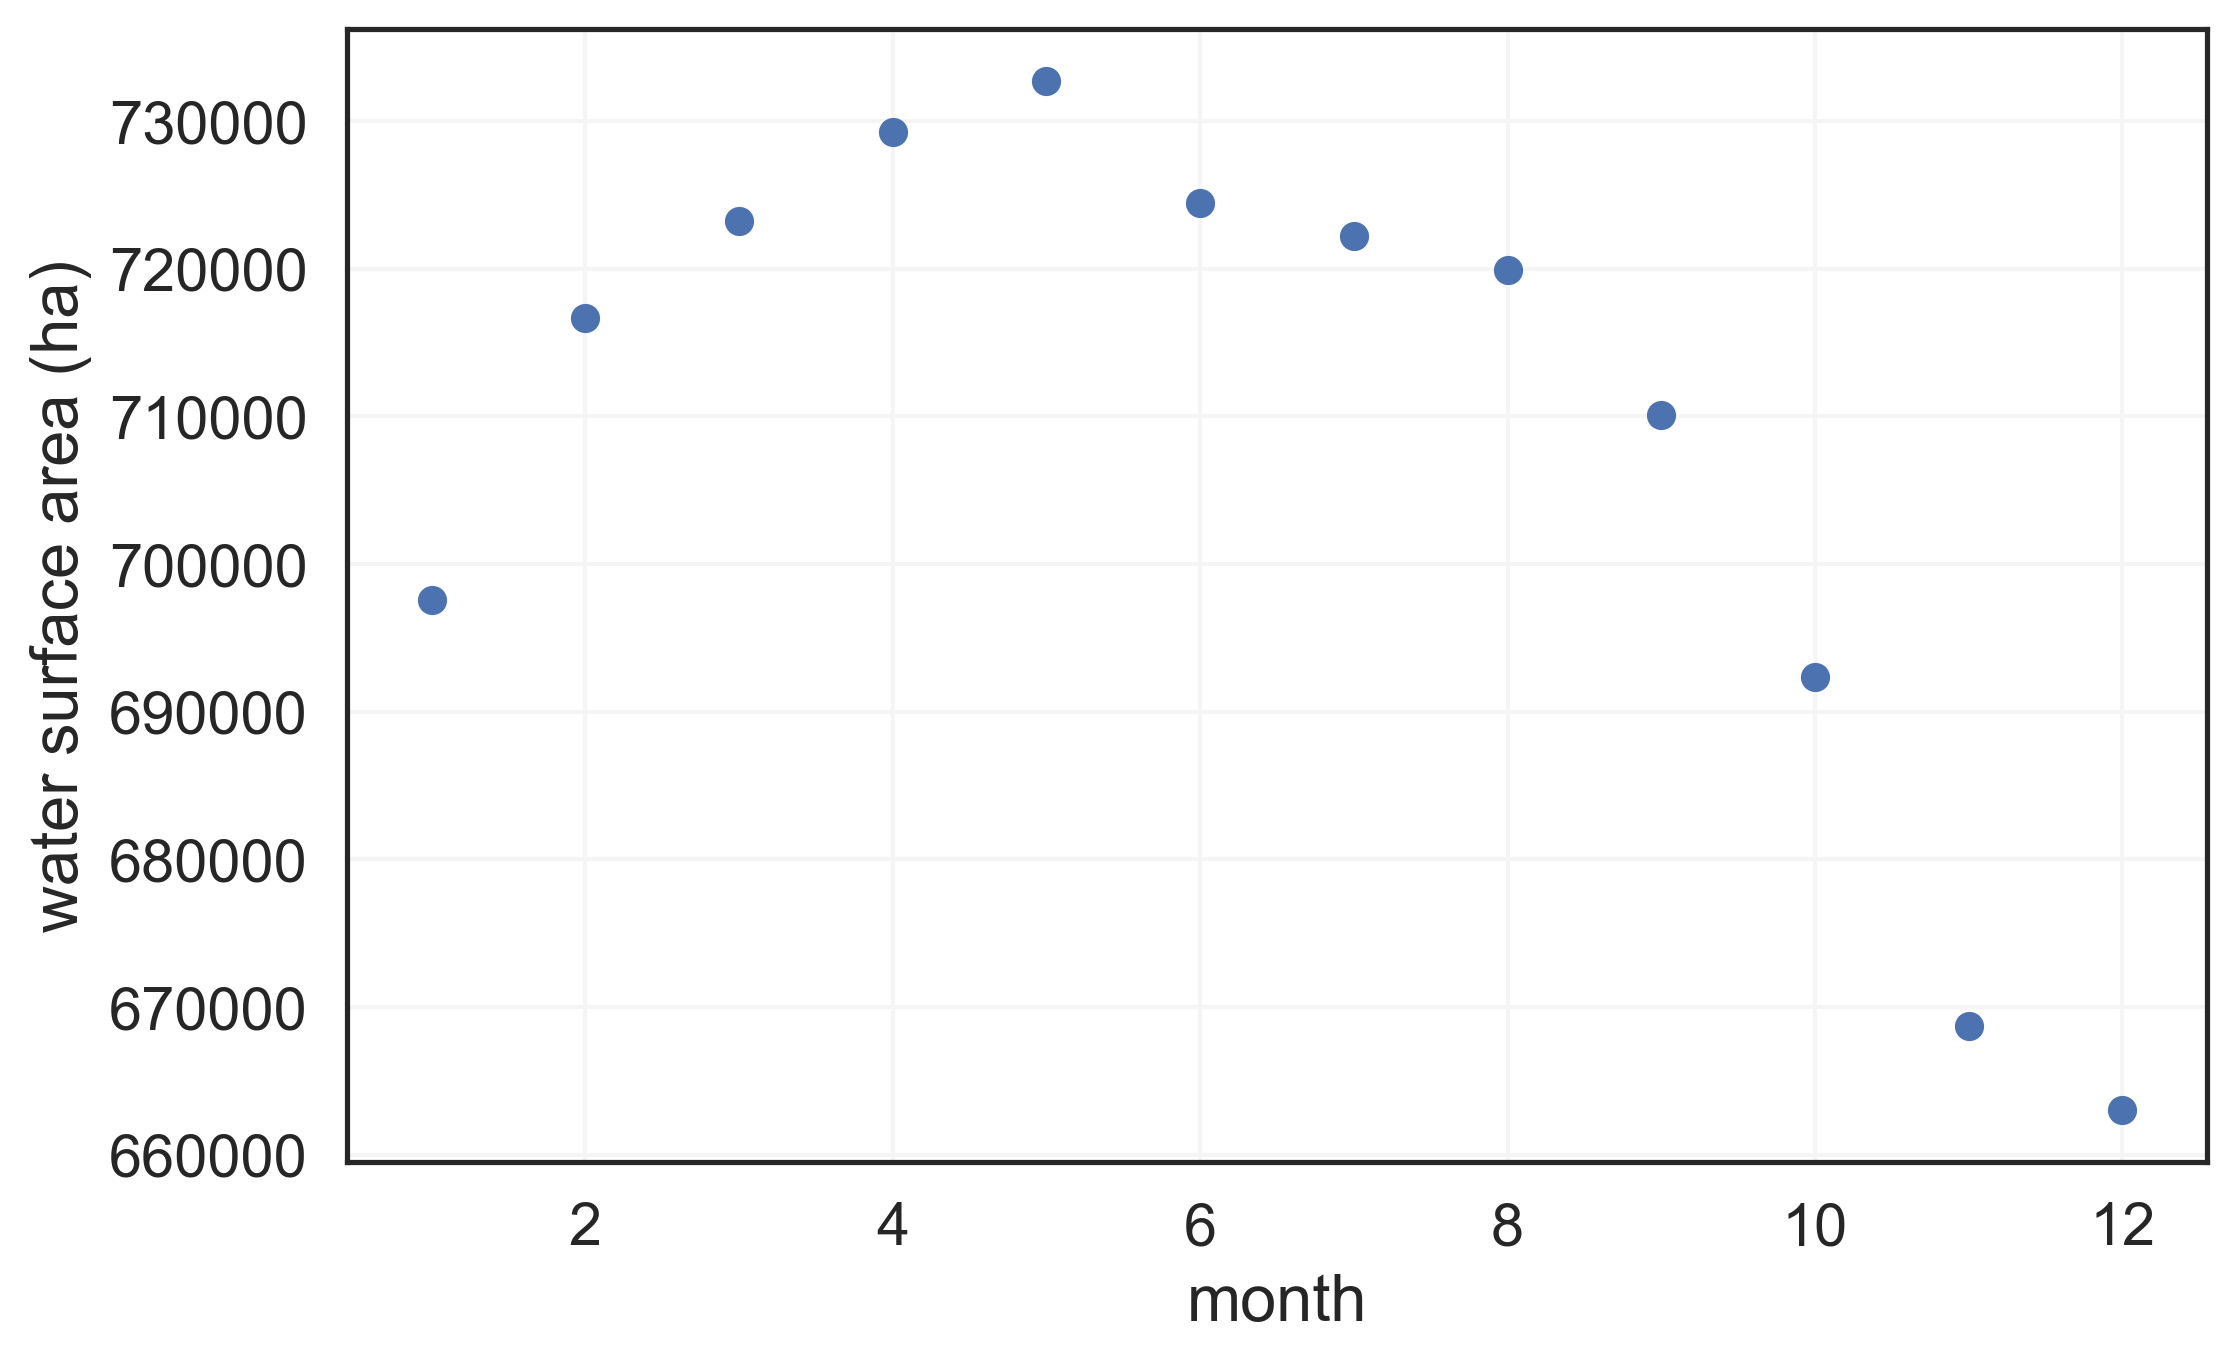

In [68]:
# mean and std deviation of surface area data

sfA_ = sfA.set_index(['Data'])
sfA_mean = sfA_.groupby(sfA_.index.month).mean() # mean for the whole basin
sfA_std = sfA_.groupby(sfA_.index.month).std()

f, ax = plt.subplots(figsize=[8,5], dpi=300)

plt.grid('both', color='whitesmoke')
ax.scatter(sfA_mean.index, sfA_mean['Area'], marker='o')

# ax.errorbar(sfA_mean.index, sfA_mean['Area'], sfA_std['Area'])
plt.ylabel('water surface area (ha)')
plt.xlabel('month')
plt.show()


# saves figure in same directory as the code file
f.savefig('sf_monthly_area.png',bbox_inches='tight')

In [69]:
# def myfunc(x,y):
#     return x - y
# sfA_decom = sfA_.groupby(sfA_.index.month).


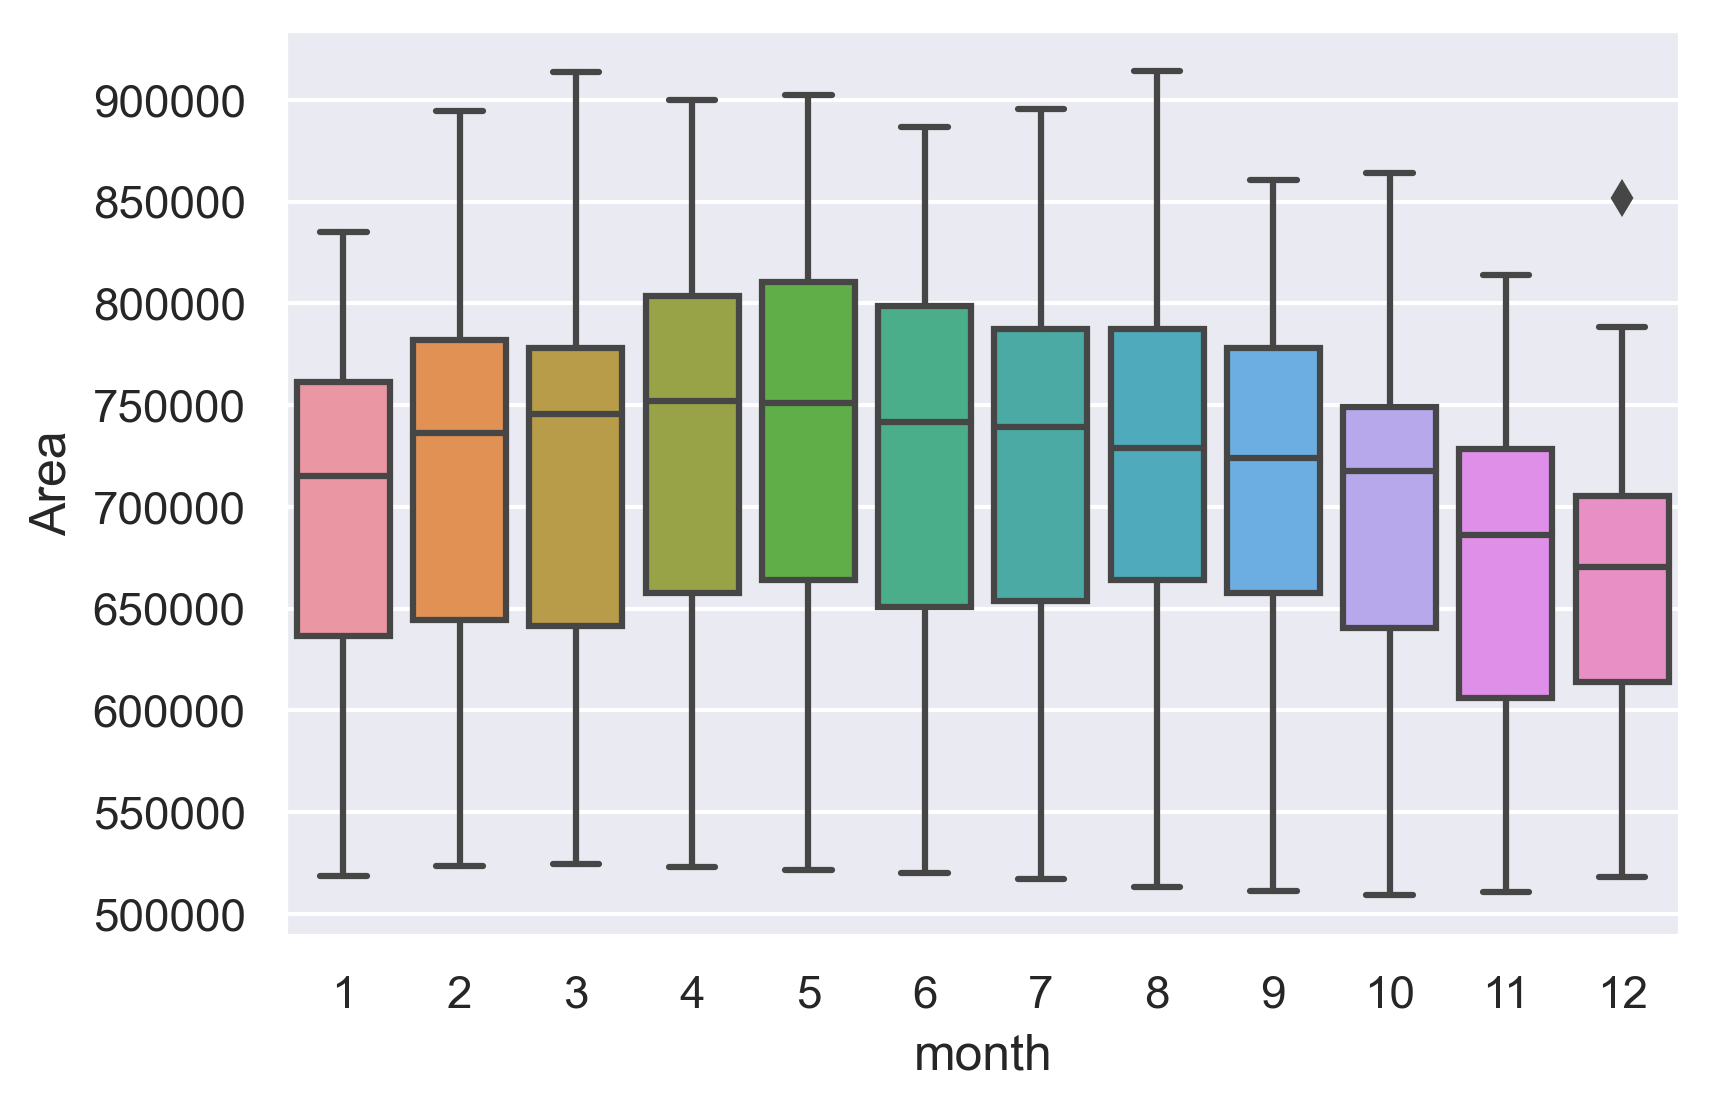

In [70]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sfA_['month'] = sfA_.index.month
ax = sns.boxplot(x="month", y="Area", data=sfA_)

plt.savefig('sf_monthly_area_boxplot.png')

In [71]:
sfA_mean

Area          Trend  Count
Data                                     
1     697578.367183  692953.640972  210.0
2     716658.090831  705399.609497  211.0
3     723215.606622  718097.612242  212.0
4     729247.501494  729793.352744  213.0
5     732729.919139  735787.438864  214.0
6     724449.329867  734664.872908  215.0
7     722226.624300  726657.093211  216.0
8     719942.493792  713332.212969  217.0
9     710063.712583  698409.873333  218.0
10    692340.251731  686226.336825  219.0
11    668693.805097  679239.365606  220.0
12    662995.843742  679580.137217  221.0

### Method 2: xagg (area-weighted average)

In [ ]:
url =  ("/Users/mariafleury/Desktop/Senior Thesis/coding/RegioesHidrograficasBrasil/Regi%C3%B5es_Hidrogr%C3%A1ficas.shp")
basins = gpd.read_file(url)
basins.head()
sf_full = basins_gdf[basins_gdf.rhi_nm == "SÃO FRANCISCO"]
sf_full

In [ ]:
#debugging
sf_full
sf_full2 = sf_full[["rhi_nm","geometry"]]
jpl
sf_full

In [ ]:
# find the weights for each pixel within the shapefile
sf_weights = xagg.pixel_overlaps(jpl, sf_full)

In [ ]:
plt.plot(sf_weights)

In [ ]:
# Aggregate with weights and convert to dataframe
# (note that this function also 'aggregates' the uncertainty, but the
# total uncertainty for a region will not be the area-weighted mean).
sf_agg = xagg.aggregate(jpl, sf_weights)
sf_aggdf = sf_agg.to_dataframe()
sf_aggdf

In [ ]:
# Subset the lwe_thickness variable and plot...
# There are some weird indices going on, probably remnants of the
# netcdf metadata. The code following 'xs' function
# will get down to just one index, datetime:
sf_tws = sf_aggdf['lwe_thickness0']
np.shape(sf_tws)

In [ ]:
f, ax = plt.subplots()
sf_tws.plot(ax=ax,color='blue')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))